# 1.Neural networks

# 1.1 Поиск коэффициентов регрессии матричным методом

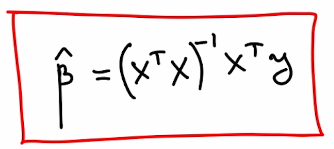

In [1]:
#формула для вычисления оценочных коэффициентов регрессии
from IPython.display import Image #display picture
Image('coef-formula.png')

import urllib
from urllib import request
import numpy as np

fname = input()  # read file name from stdin
f = urllib.request.urlopen(fname)  # open file from URL
data = np.loadtxt(f, delimiter=',', skiprows=1)  # load data to work with

y = data[:, 0]
X = np.hstack((np.ones((len(data), 1)),
               data[:, 1:]))
step1 = X.T.dot(X)
step2 = np.linalg.inv(step1)
step3 = step2.dot(X.T)
print(" ".join(map(str, step3.dot(y))))   #variant 1
print(*step3.dot(y))                      #variant 2

In [2]:
#np.hstack((array1, array2, ...))  # склеивает по строкам массивы, являющиеся компонентами кортежа, 
#поданного на вход; массивы должны совпадать по всем измерениям, кроме второго
#np.ones_like(array)  # создаёт массив, состоящий из единиц, идентичный по форме массиву array
#"delim".join(array)  # возвращает строку, состоящую из элементов array, разделённых символами "delim"
#map(str, array)  # применяет функцию str к каждому элементу array

# 1.2 Нейроны: настоящие и искуственные

In [3]:
#Нейропластичность — это свойство человеческого мозга, заключающееся в возможности изменяться под действием опыта, 
#а также восстанавливать утраченные связи после повреждения или в качестве ответа на внешние воздействия.

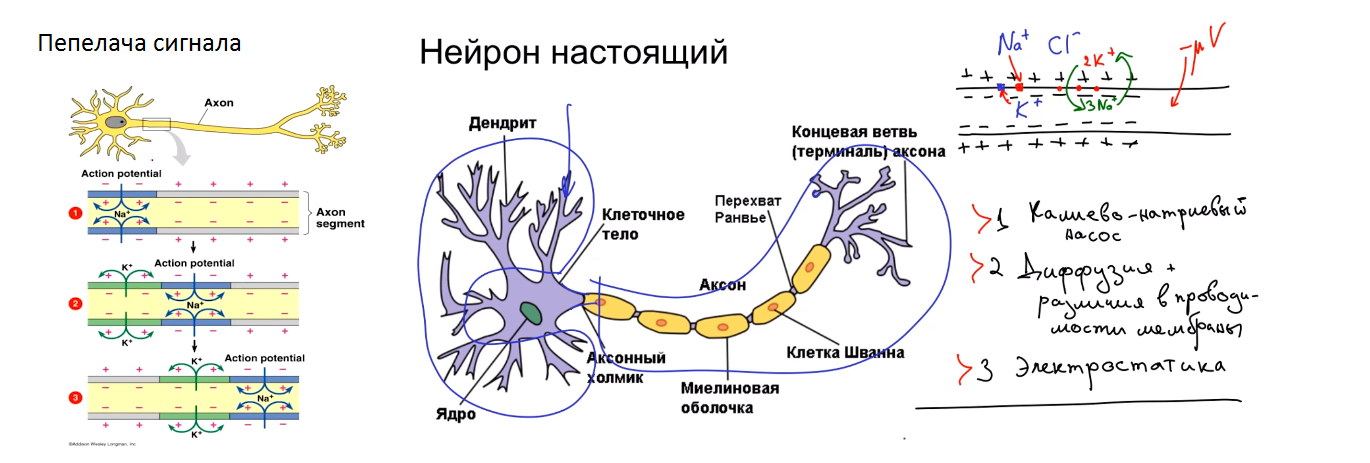

In [4]:
#Схема нейрона, и механизм передачи информации нейроном
from IPython.display import Image #display picture
Image('neuron.png')

In [5]:
#Синапс - связи между нейронами
#Пути обучения биологического Нейрона:
#1)Изменение эффективности синапсов(связей)
#2)Образование новых синапсов(связей)

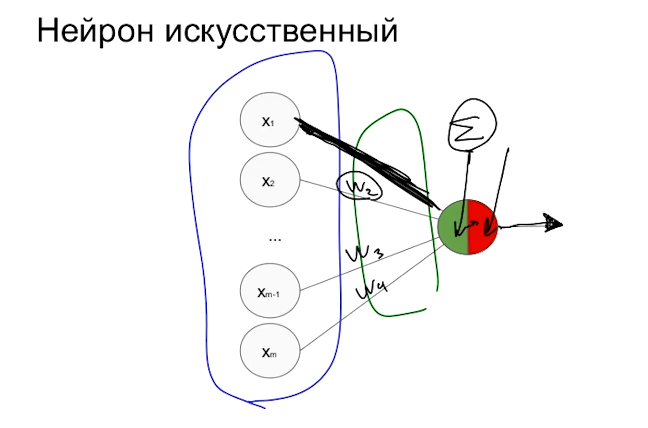

In [6]:
#Искуственный нейрон состоит из следующих элементов:
#1)Вход
#2)Веса(weight)
#3)Сумматорная функция (sum)
#4)Активационная функция
#5)Выход
Image('synthetic_neuron.png')

In [7]:
#Главный вопрос - как менять веса, чтобы искуственная сеть чему-нибудь обучалась

# 1.3 Перцептрон - модель искуственного нейрона

In [8]:
#Перцептроны часто используются в случаях, когда есть большое количество предикторов

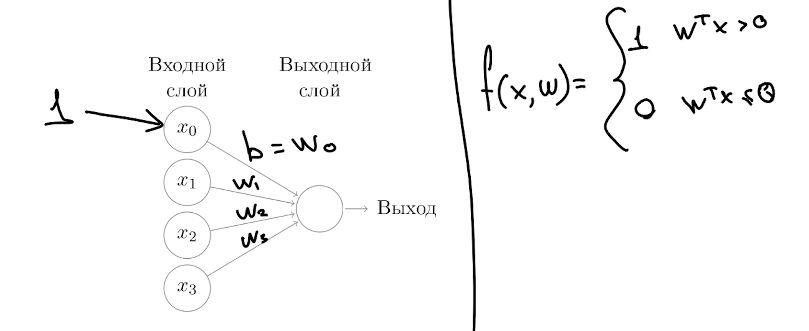

In [9]:
#Активаторная функция - сравнивает сумматорную функцию с нулем
#Сумматорная функция суммирует произведение входных данных и весов 
Image('perceptrone.png')

# 1.4 Обучение перцептрона

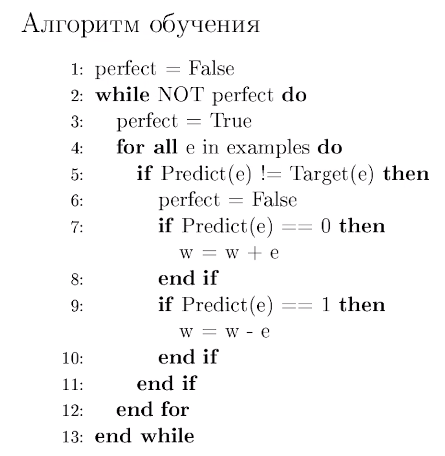

In [10]:
#Псведокод обучения перцептрона
#алгоритм меняет веса в зависимости от фолс позитив, фолс негатив рейта
Image('pseudo_code.png')

In [11]:
#Алгоритм обучения перцептрона
example = [[1, 1, 0.3, 1], 
           [1, 0.4, 0.5, 1], 
           [1, 0.7, 0.8, 0]]
w = [0, 0, 0]
print('step0 wights: [0, 0, 0]')
perfect = False
step = 1
while not perfect:
  perfect = True
  for e in example:
    dot = e[0]*w[0] + e[1]*w[1] + e[2]*w[2]
    predict = int(dot > 0)
    target = e[3]
    if predict != target:
      perfect = False
      for i in range(len(w)):
        w[i] += (target-predict) * e[i]
    print( 'step' + str(step) + ' wights: ' + str(w) )
    step+=1

step0 wights: [0, 0, 0]
step1 wights: [1, 1, 0.3]
step2 wights: [1, 1, 0.3]
step3 wights: [0, 0.30000000000000004, -0.5]
step4 wights: [0, 0.30000000000000004, -0.5]
step5 wights: [1, 0.7000000000000001, 0.0]
step6 wights: [0, 1.1102230246251565e-16, -0.8]
step7 wights: [1, 1.0, -0.5]
step8 wights: [1, 1.0, -0.5]
step9 wights: [0, 0.30000000000000004, -1.3]
step10 wights: [1, 1.3, -1.0]
step11 wights: [1, 1.3, -1.0]
step12 wights: [0, 0.6000000000000001, -1.8]
step13 wights: [0, 0.6000000000000001, -1.8]
step14 wights: [1, 1.0, -1.3]
step15 wights: [0, 0.30000000000000004, -2.1]
step16 wights: [1, 1.3, -1.8]
step17 wights: [1, 1.3, -1.8]
step18 wights: [0, 0.6000000000000001, -2.6]
step19 wights: [1, 1.6, -2.3000000000000003]
step20 wights: [1, 1.6, -2.3000000000000003]
step21 wights: [0, 0.9000000000000001, -3.1000000000000005]
step22 wights: [1, 1.9000000000000001, -2.8000000000000007]
step23 wights: [1, 1.9000000000000001, -2.8000000000000007]
step24 wights: [0, 1.2000000000000002, 

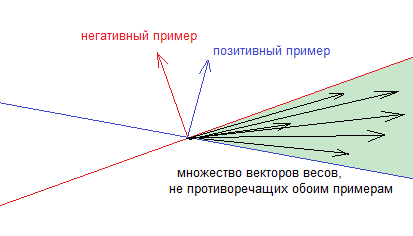

In [12]:
#поиск весов в векторном выражении, веса должны быть подобраны таким образом, что 
#скалярное произведение вектора позитивного примера, на вектор веса должно быть больше 0, 
#а скалярное произведение вектора негативного примера на вектор веса должно быть меньше 0
#алгоритм сходится подбирая векторы весов
Image('ortho2.png')

In [13]:
#ограничения перцептронов: XOR проблема (противоречивая система уравнений)

# 1.5 Типы нейронов

In [14]:
#Типы нейронов:
#1)Линейный нейрон
#2)Сигмоидальный нейрон
#3)Гиперболический тангенс
#4)Полулинейный нейрон
#5)Софтплас нейрон
#Все эти нейроны отличаются только активационной функцией, всзвешенная функция - это всегда взвешенная сумма от входов

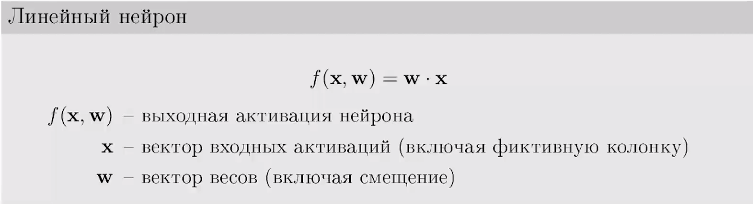

In [15]:
#1)Линейный нейрон(активационная функция - линейная), матрица x учитывает b ввиде первой колонки с единицами 
#такие нейроны полезны при получении какой либо величины (например рост человека)
from IPython.display import Image #display picture
Image('linear_neurone.png')

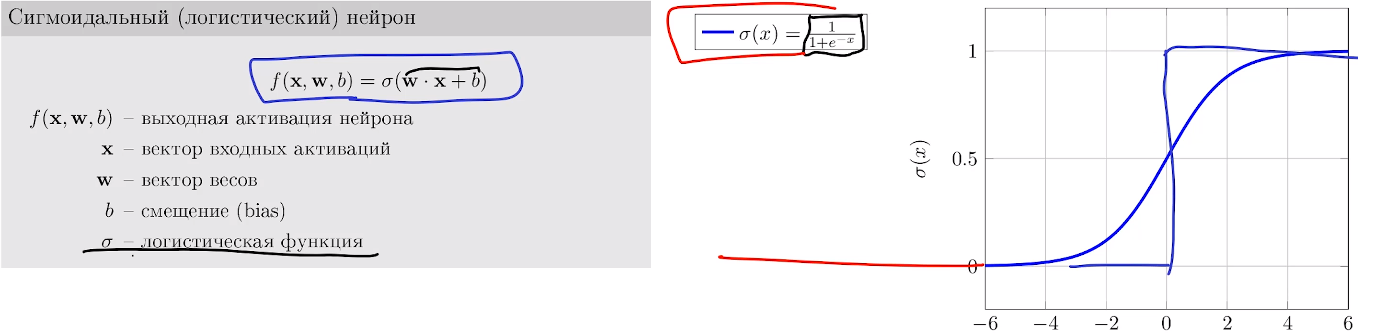

In [16]:
#2)Сигмоидальный нейрон (активационная функция - сигмоида)
#позволяет диференциорвать функцию, получать например вероятностные значения
Image('sigmoidal_neurone.png')

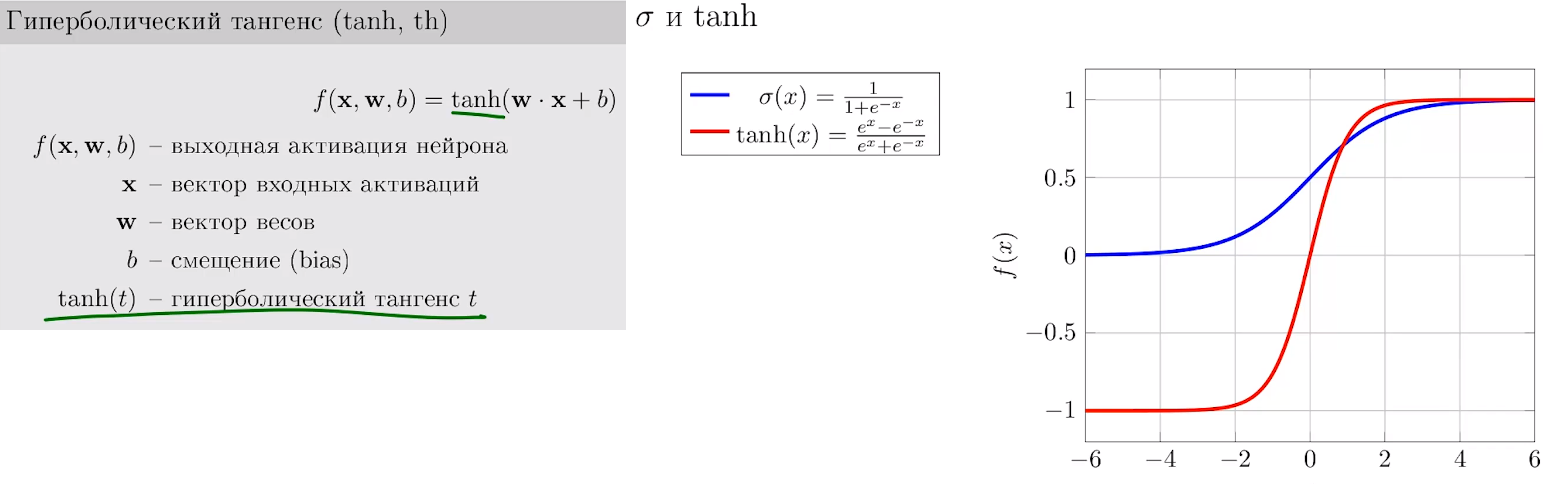

In [17]:
#3)Гиперболический тангенс(активационная функция - tanh)
Image('hyperbolic_tanh_neurone.png')

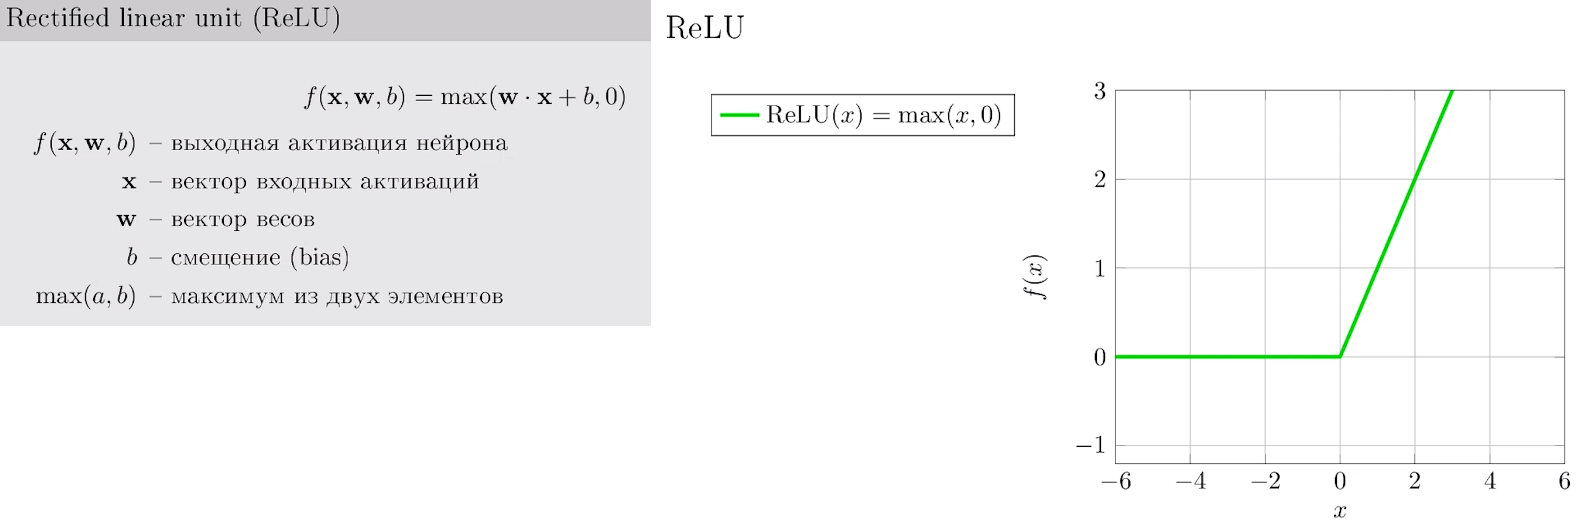

In [18]:
#4)ReLU neurone (активационная функция - max(x,0) - недефиренцируема)
Image('ReLU_neurone.png')

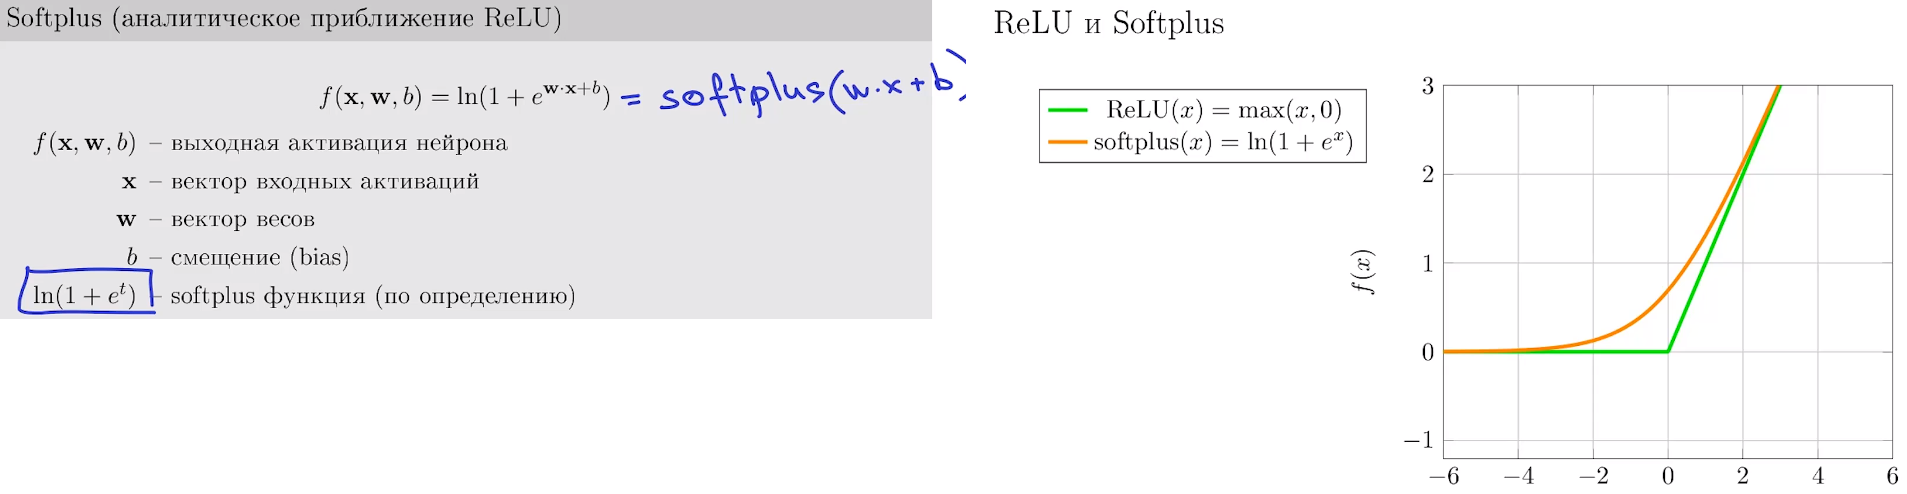

In [19]:
#5)Soft-plus-neurone (активационная функция - логорифм - дефиренцируема)
Image('soft_plus_neurone.png')

# 1.6 Градиентный спуск

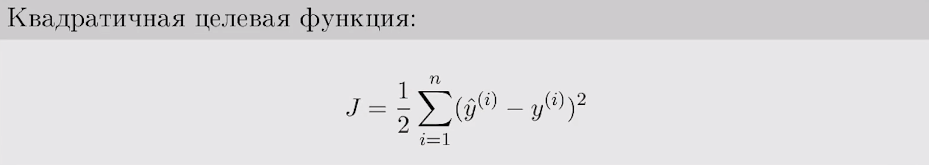

In [20]:
#Целевая функция(функция потерь) - мера успешности алгоритма
from IPython.display import Image #display picture
Image('squared_function.png')

In [21]:
#Градиентный спуск - метод определения целевой функции по её графику

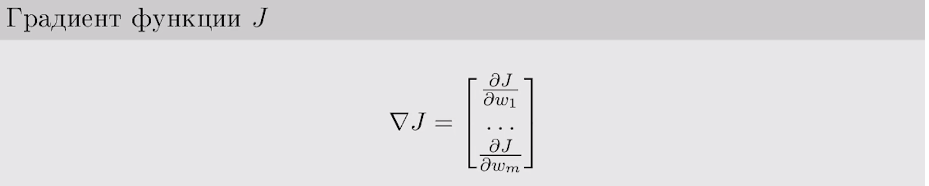

In [22]:
#Градие́нт — вектор, своим направлением указывающий направление наибольшего возрастания некоторой величины 
#значение которой меняется от одной точки пространства к другой, а по величине равный скорости роста этой 
#величины в этом направлении.
#Градиент(nabla) - вектор составленный из частных производных функции по всем её аргументам
Image('gradient.png')

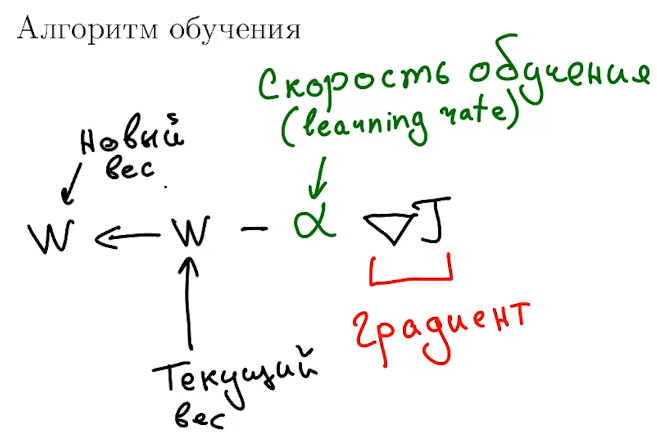

In [23]:
#Получая градиент (вектор наибольшего возрастания функции), мы можем, умножив его на -1, получить вектор наибольшего
#убивания функции, таким образом мы можем изменять веса нашего алгоритма до тех пор, пока максимально
#не приблизим изменение весов по направлению градиента
Image('learning_algorithm.png')

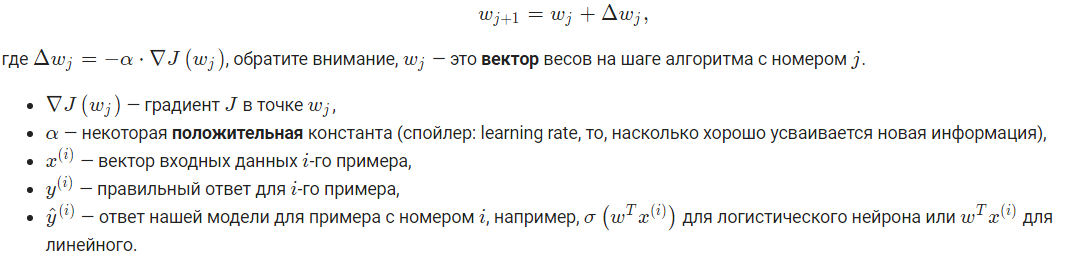

In [24]:
#Правило изменения весов
Image('rule_change_weights.png')

In [25]:
# a - learning rate - шаг изменения весов - при большом шаге мы можем проскочить тот минимум, который нам нужен
#при малом шаге - можем застрять в ложном минимуме

In [26]:
#Теория
#http://www.mathprofi.ru/opredelenie_proizvodnoi_smysl_proizvodnoi.html﻿
#http://www.mathprofi.ru/predel_funkcii_dvuh_peremennyh.html
#http://www.mathprofi.ru/chastnye_proizvodnye_primery.html
#http://www.mathprofi.ru/proizvodnaja_po_napravleniju_i_gradient.html﻿

# 1.7 Расчет градиента операции над матрицами

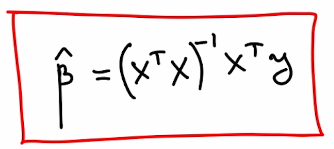

In [27]:
from IPython.display import Image #display picture
Image('coef-formula.png')

In [28]:
import numpy as np
X = np.array([[1, 60],
              [1, 50],
              [1, 75]])

y = np.array([[10], 
              [7],
              [12]])

In [29]:
step1 = X.T.dot(X)
step2 = np.linalg.inv(step1)
step3 = step2.dot(X.T)
step3.dot(y)

array([[-2.34210526],
       [ 0.19473684]])

In [30]:
import numpy as np

In [31]:
#https://math1.ru/education/sys_lin_eq/kapelli.html

In [32]:
A = np.array([[1, 2, 3], 
              [-4, -3, -2]]) 
B = np.array([[-1, -2, -3], 
               [4, 5, 6]])
C = np.add(-8*A, B)                            #addition
C

array([[ -9, -18, -27],
       [ 36,  29,  22]])

In [33]:
A = np.array([[1, 2, 3], 
              [-4, 4, -2]]) 
B_T = np.array([[3, -2, -3], 
               [4, 5, 6]])
B = np.matrix.transpose(B_T)  #transpose
C = np.matmul(A, B)            #multiplication
C

array([[-10,  32],
       [-14,  -8]])

In [34]:
A = np.array([[-8, 2, 3],
              [-4, 6, 6],
              [1, 2, 7]])
E1 = np.array([[0, 1, 0],
              [1, 0, 0],
              [0, 0, 1]])
E2 = np.array([[1, 6, 0],
              [0, 1, 0],
              [0, 0, 1]])
E3 = np.array([[7, 0, 0],
              [0, 1, 0],
              [0, 0, 1]])
l = [E1, E3, E2, A]
for i in range(1, len(l)):
    C = np.matmul(l[0], l[i])
    l[0] = C
np.trace(C)

269

In [35]:
A = np.array([[1, 2, 8],
              [-4, 2, 6],
              [6, 2, 3]])
np.linalg.inv(A)

array([[ 0.08571429, -0.14285714,  0.05714286],
       [-0.68571429,  0.64285714,  0.54285714],
       [ 0.28571429, -0.14285714, -0.14285714]])

In [36]:
A = np.array([[1, 2, 8],
              [-4, 2, 6],
              [6, 2, 3]])
B = np.linalg.inv(A)           #invert matrix
C = B * np.linalg.det(A)       #A*(Adjugate matrix) and determinant

def adjugate_matrix(A:np.array):                 # Adjugate matrix function
    return np.linalg.inv(A)*np.linalg.det(A)

adjugate_matrix(A)

array([[ -6.,  10.,  -4.],
       [ 48., -45., -38.],
       [-20.,  10.,  10.]])

In [37]:
A = np.array([[1, 2, 3],
              [0, 1, -1],
              [1, 1, -1]])
B = np.array([[1],
             [-2],
             [0]])
np.matmul(np.linalg.inv(A), B) #matrix method

array([[ 2. ],
       [-1.4],
       [ 0.6]])

In [38]:
A = np.array([[7, 2, 3],
              [-4, 5, -6],
              [1, 2, 5]])
np.linalg.det(A)

247.99999999999986

In [39]:
A = np.array([[-2, 2, 3, 0],
              [-4, 7, -6, 0],
              [1, 2, 8, 0],
              [0, 0, -8, 2]])
np.linalg.det(A)

-258.0

In [40]:
E1 = np.array([[0, 1, 0],
              [1, 0, 0],
              [0, 0, 1]])
E2 = np.array([[1, 1, 0],
              [0, 1, 0],
              [0, 0, -10]])
E3 = np.array([[6, 0, 0],
              [0, 1, 0],
              [0, 0, 1]])

l = [E1, E2, E3, E2, E3]
def mat_mult(l:list):
    """compute matrix list multiplication"""
    for i in range(1, len(l)):
        A = np.matmul(l[0], l[i])
        l[0] = A
    return(l[0])
    
np.linalg.det(mat_mult(l))

-3600.0000000000045

In [41]:
A = np.array([[1, -1],
              [1, 0]])
B = np.array([[8],
              [-10]])
np.matmul(np.linalg.inv(A), B)

array([[-10.],
       [-18.]])

In [42]:
import numpy as np
ac = (36+49-2*6*7*np.cos(np.pi*0.8))**0.5
ac*6*np.cos(np.pi*0.1)

70.57369584084461

In [43]:
np.sin(np.pi*0.2)

0.5877852522924731

In [44]:
A = np.array([[0.809, 0.588],
              [0.588, 0.809]])
B = np.array([[0.5],
              [0.5]])
np.matmul(np.linalg.inv(A), B)

array([[0.35790981],
       [0.35790981]])

In [45]:
E1 = np.array([[1, 0, -1/3],
              [0, 1, 0],
              [0, 0, 1]])
E2 = np.array([[-3],
              [10],
              [1]])
np.matmul(np.linalg.inv(E1), E2)

array([[-2.66666667],
       [10.        ],
       [ 1.        ]])

In [46]:
np.matmul(np.linalg.inv(E1), E2)

array([[-2.66666667],
       [10.        ],
       [ 1.        ]])

In [47]:
#a.dot(b) — матричное произведение двух массивов (размерности должны быть согласованы),
#linalg.matrix_power(M, n) — возведение матрицы M в степень n,
#a.T — транспонирование
#linalg.norm(a, ord=None) — норма матрицы a, по умолчанию норма Фробениуса для матриц и 
#L2-норма для векторов; подробное описание возможных норм — в справке,
#linalg.inv(a) — матрица, обратная к a (если a необратима, выбрасывается LinAlgError; 
#псевдообратная считается через linalg.pinv(a))

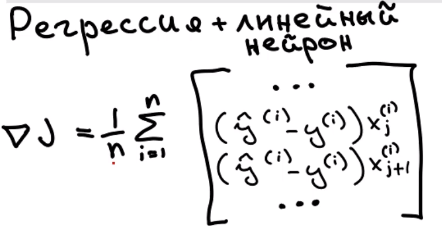

In [48]:
#Градиент - это вектор состоящий из частных производных функции
#Стохастический градиентный спуск - расчет градиента производящийся на части данных
from IPython.display import Image #display picture
Image('gradient_calculation.png') 

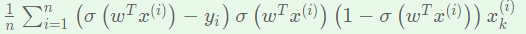

In [49]:
#Формула расчета координат градиента для сигмоидального нейрона
from IPython.display import Image #display picture
Image('formula_gradient.png') 

In [50]:
#Для расчет градиента применяются:
#1)Символьное дифференцирование - проверяет правльность вывода формул (библиотека Тиану) 
#Python theano.scan Examples  https://www.programcreek.com/python/example/61556/theano.scan
#2)Численное дифференцирование - проверка чисел
#3)Автоматическое дифференцирование - позволяет получить градиент без вывода формул(по описанной функции)

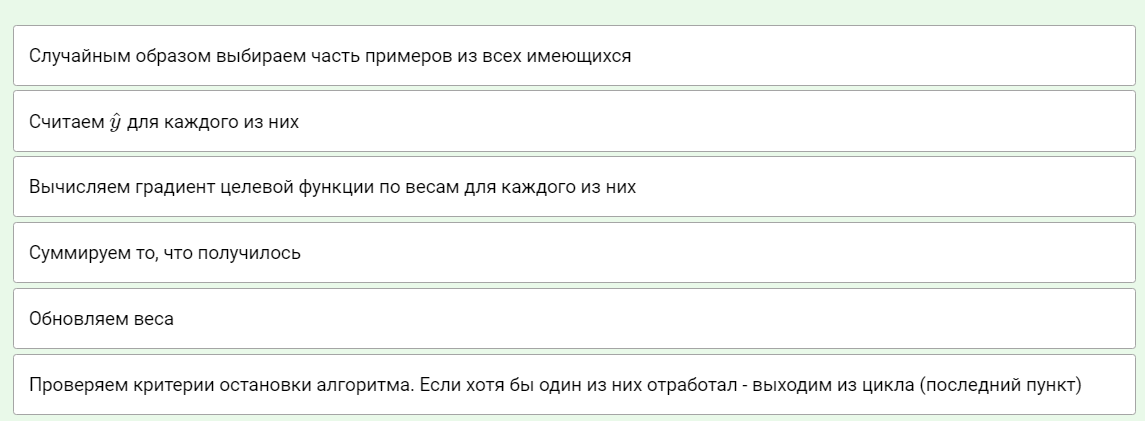

In [51]:
from IPython.display import Image #display picture
Image('grad_algorithm.png') 

# 1.8 Реализация однослойной нейронной сети на перцептронах

## Введение

На этой неделе было много новой информации. Чтобы всё это запомнилось, необходимо попрактиковаться.

В этом нам поможет главный персонаж нашего курса, существо по имени Зюк (Zookee) с далёкой планеты Нейра.
Нейряне не так уж сильно отличаются от землян, но для того, чтобы чему-то научиться, им каждый раз приходится формировать набор данных и сознательно программировать небольшую нейросеть в своём мозгу. В этом есть свои плюсы и минусы, но обсуждение этих вопросов выходит далеко за рамки нашего курса.

Важно что Зюк очень любит путешествовать и недавно он прилетел к нам.

<img src="https://raw.githubusercontent.com/stacymiller/stepic_neural_networks_public/master/files/ship_bq.jpg" width=500/>

Мы, конечно, обрадовались его визиту, ведь сразу было видно, что он очень добрый, общительный и, конечно, необычный. Мы договорились, что будем помогать ему собирать данные, а он поделится своим опытом программирования нейросетей. Мы немало удивились, узнав, что многие из его нейросетей написаны на Python. По его выражению, Python - это лучшее из того, что придумали земляне.

## Перцептрон

После небольшой прогулки Зюк сильно проголодался. Кроме того, оказалось, что он очень привередлив в еде:
едва попробовав очередное блюдо, он менялся в цвете и вежливо отказывался. К счастью, ему пришлись по нраву яблоки, и вопрос с едой был решен.

Однако в наше отсутствие Зюк оставался совершенно беспомощным, поскольку, гуляя в саду, он не мог отличить яблоки от груш (которые были ему совершенно ненавистны), не попробовав их на вкус.

<img src="https://raw.githubusercontent.com/stacymiller/stepic_neural_networks_public/master/files/apples.jpg" width=300 />

Сформировав путём горьких ошибок небольшой набор данных, Зюк достал какое-то странное устройство и начал программировать перцептрон. Мы вызвались помочь, и он, улыбнувшись, согласился.

По его словам, задача должна была оказаться достаточно простой, учитывая что у него в запасе были сети, способные извлекать такие высокоуровневые характеристики, как симметричность и желтизна объекта.

### Загрузка данных

Первым делом мы решили подготовить всё, что нам может понадобится, и разобраться с набором данных:

In [52]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as p3
import numpy as np
import random
import time

from functools import partial
from ipywidgets import interact, RadioButtons, IntSlider, FloatSlider, Dropdown, BoundedFloatText
from numpy.linalg import norm

random.seed(42) # начальное состояние генератора случайных чисел, чтобы можно было воспроизводить результаты.

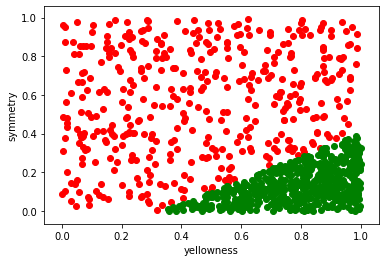

In [53]:
%matplotlib inline
data = np.loadtxt("data1.csv", delimiter=",")
pears = data[:, 2] == 1
apples = np.logical_not(pears)
plt.scatter(data[apples][:, 0], data[apples][:, 1], color = "red")
plt.scatter(data[pears][:, 0], data[pears][:, 1], color = "green")
plt.xlabel("yellowness")
plt.ylabel("symmetry")
plt.show()

Данные -  матрица $1000 \times 3$, в каждой строке указаны желтизна и симметричность очередного фрукта (в первой и второй колонках) и его сортовая принадлежность (третья колонка, 0 - яблоки, 1 - груши).

Задача действительно выглядела не очень сложно.

Когда данные были загружены, мы захотели впечатлить Зюка своими познаниями и сразу ринулись писать алгоритм обучения перцептрона, однако Зюк остановил нас, напомнив, что сперва нужно решить, какой вообще будет структура модуля, распознающего яблоки и груши. Мы призадумались, и он с ностальгической улыбкой показал нам одну из своих заготовок:

# Перцептрон

In [54]:
class Perceptron:

    def __init__(self, w, b):
        """
        Инициализируем наш объект - перцептрон.
        w - вектор весов размера (m, 1), где m - количество переменных
        b - число
        """
        
        self.w = w
        self.b = b

    def forward_pass(self, single_input):
        """
        Метод рассчитывает ответ перцептрона при предъявлении одного примера
        single_input - вектор примера размера (m, 1).
        Метод возвращает число (0 или 1) или boolean (True/False)
        """
        
        result = 0
        for i in range(0, len(self.w)):
            result += self.w[i] * single_input[i]
        result += self.b
        
        if result > 0:
            return 1
        else:
            return 0

    def vectorized_forward_pass(self, input_matrix):
        """
        Метод рассчитывает ответ перцептрона при предъявлении набора примеров
        input_matrix - матрица примеров размера (n, m), каждая строка - отдельный пример,
        n - количество примеров, m - количество переменных
        Возвращает вертикальный вектор размера (n, 1) с ответами перцептрона
        (элементы вектора - boolean или целые числа (0 или 1))
        """
        self.x = input_matrix
        return self.x.dot(self.w)+self.b > 0
    
    def train_on_single_example(self, example, y):
        """
        принимает вектор активации входов example формы (m, 1) 
        и правильный ответ для него (число 0 или 1 или boolean),
        обновляет значения весов перцептрона в соответствии с этим примером
        и возвращает размер ошибки, которая случилась на этом примере до изменения весов (0 или 1)
        (на её основании мы потом построим интересный график)
        """
        self.train_x = example
        self.train_y = y
        predict = self.vectorized_forward_pass(self.train_x.T)[0][0]
        self.w += (self.train_y - predict) * self.train_x
        self.b += self.train_y - predict
        return y - predict

Оказалось, что это был первый нейрон, который он запрограммировал сам. Он рассказал, что метод `train_on_single_example` остался без реализации, так как в то время веса ему еще готовила мама. Векторизовать он, как и все дети, не любил, поэтому данный метод тоже не готов.

Мы с лёгким нетерпением спросили, можно ли нам что-нибудь запрограммировать. Убедившись, что мы разобрались в приведённом коде, Зюк поставил задачу:

### Реализовать метод `vectorized_forward_pass`

Это метод, который считает значения активационной функции нейрона. 

На вход он принимает матрицу активаций размера $n \times m$ и вектор ответов длины $n$. Каждая строка - отдельный пример. В случае с яблоками и грушами матрица будет размера $n \times 2$, где $n$ - количество примеров, для которых мы хотим получить решения (но, конечно, когда мы будем проверять ваши решения, у данных может быть и другой размер!).  `vectorized_forward_pass` отдаёт столбец (формы $n\times 1$) значений активационной функции нейрона для всех переданных ему входных данных. Зюк предупредил, что если мы будем использовать **циклы** (`for`, `while`) или **операторы ветвления** (`if`) - **решение не пройдёт его внутреннюю проверку**.

Было что-то занудное в его голосе, но что делать? Видимо, это та цена, которую нужно платить, если хочешь, чтобы тебя поняли.

/// Чтобы всё работало - впишите свою реализацию в предоставленный выше шаблон и сдайте функцию на сайте курса, чтобы <br>
/// проверить, что решение правильное. Имейте в виду: наши тесты не охватывают всех возможных характеристик, <br>
/// поэтому постарайтесь делать качественно, иначе незамеченные ошибки могут накапливаться. <br>
/// Не забудьте запустить код в ячейке, иначе Python будет помнить старую версию того, что было написано

### Тестирование

Мы с непривычки здорово намучились, и у нас назрел вопрос: а так ли нужна эта векторизация для классификации яблок?

\- Смотря насколько вы цените своё время, - задумчиво ответил Зюк, - признаюсь, я и сам уже привык
воспринимать векторизацию как что-то само собой разумеющееся, впитанное с молоком матери, как у вас говорят. 

Вдруг что-то озорное появилось в его глазах, и он весело предложил: "Так давайте проверим!".

Выхватив пульт управления, Зюк начал что-то быстро печатать. Не прошло и минуты, как он гордо представил нам свои результаты:


In [55]:
def create_perceptron(m):
    """Создаём перцептрон со случайными весами и m входами"""
    w = np.random.random((m, 1))
    return Perceptron(w, 1)

In [56]:
def test_v_f_p(n, m):
    """
    Расчитывает для перцептрона с m входами
    с помощью методов forward_pass и vectorized_forward_pass
    n ответов перцептрона на случайных данных.
    Возвращает время, затраченное vectorized_forward_pass и forward_pass
    на эти расчёты.
    """
    
    p = create_perceptron(m)
    input_m = np.random.random_sample((n, m))
    
    start = time.perf_counter()
    vec = p.vectorized_forward_pass(input_m)
    end = time.perf_counter()
    vector_time = end - start
    
    start = time.perf_counter()
    for i in range(0, n):
        p.forward_pass(input_m[i]) 
    end = time.perf_counter()
    plain_time = end - start

    return [vector_time, plain_time]

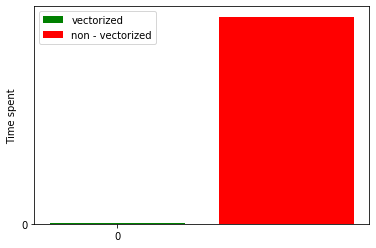

In [57]:
def mean_execution_time(n, m, trials=100):
    """среднее время выполнения forward_pass и vectorized_forward_pass за trials испытаний"""
    
    return np.array([test_v_f_p(m, n) for _ in range(trials)]).mean(axis=0)

def plot_mean_execution_time(n, m):
    """рисует графики среднего времени выполнения forward_pass и vectorized_forward_pass"""
    
    mean_vectorized, mean_plain = mean_execution_time(int(n), int(m))
    p1 = plt.bar([0], mean_vectorized,  color='g')
    p2 = plt.bar([1], mean_plain, color='r')

    plt.ylabel("Time spent")
    plt.yticks(np.arange(0, mean_plain))

    plt.xticks(range(0,1))
    plt.legend(("vectorized","non - vectorized"))

    plt.show()

#interact(plot_mean_execution_time, 
            #n=RadioButtons(options=["1", "10", "100"]),
            #m=RadioButtons(options=["1", "10", "100"], separator=" "));
plot_mean_execution_time(100, 100)

Мы принялись увлечённо экспериментировать, чтобы лучше понять, какова разница во времени работы у векторизованного и не векторизованного вариантов при разных `n` и `m`. Нетрудно заметить, что чем больше у нас данных, тем более впечатляющей эта разница становилась. 

## Обучение перцептрона

Отлично, осталось научить наш перцептрон хорошо различать груши и яблоки - и Зюк сможет гулять в саду, не оставаясь при этом голодным! Давайте напишем код, который, приняв на вход пример и правильный ответ, будет изменять веса в соответствии с правилом обучения перцептрона. Это метод `train_on_single_example`, который вам и нужно будет сейчас реализовать.

In [58]:
class Perceptron:

    def __init__(self, w, b):
        """
        Инициализируем наш объект - перцептрон.
        w - вектор весов размера (m, 1), где m - количество переменных
        b - число
        """
        self.w = w
        self.b = b

    def forward_pass(self, single_input):
        """
        Метод рассчитывает ответ перцептрона при предъявлении одного примера
        single_input - вектор примера размера (m, 1).
        Метод возвращает число (0 или 1) или boolean (True/False)
        """
        result = 0
        for i in range(0, len(self.w)):
            result += self.w[i] * single_input[i]
        result += self.b
        
        if result > 0:
            return 1
        else:
            return 0

    def vectorized_forward_pass(self, input_matrix):
        """
        Метод рассчитывает ответ перцептрона при предъявлении набора примеров
        input_matrix - матрица примеров размера (n, m), каждая строка - отдельный пример,
        n - количество примеров, m - количество переменных
        Возвращает вертикальный вектор размера (n, 1) с ответами перцептрона
        (элементы вектора - boolean или целые числа (0 или 1))
        """
        self.x = input_matrix
        return self.x.dot(self.w)+self.b > 0
    
    def train_on_single_example(self, example, y):
        """
        принимает вектор активации входов example формы (m, 1) 
        и правильный ответ для него (число 0 или 1 или boolean),
        обновляет значения весов перцептрона в соответствии с этим примером
        и возвращает размер ошибки, которая случилась на этом примере до изменения весов (0 или 1)
        (на её основании мы потом построим интересный график)
        """
        
        self.train_x = example
        self.train_y = y
        predict = self.vectorized_forward_pass(self.train_x.T)[0][0]
        self.w += (self.train_y - predict) * self.train_x
        self.b += self.train_y - predict
        return y - predict
    
    def train_until_convergence(self, input_matrix, y, max_steps=1e8):
        """
        input_matrix - матрица входов размера (n, m),
        y - вектор правильных ответов размера (n, 1) (y[i] - правильный ответ на пример input_matrix[i]),
        max_steps - максимальное количество шагов.
        Применяем train_on_single_example, пока не перестанем ошибаться или до умопомрачения.
        Константа max_steps - наше понимание того, что считать умопомрачением.
        """
        i = 0
        errors = 1
        while errors and i < max_steps:
            i += 1
            errors = 0
            for example, answer in zip(input_matrix, y):
                example = example.reshape((example.size, 1))
                error = self.train_on_single_example(example, answer)
                errors += int(error)  # int(True) = 1, int(False) = 0, так что можно не делать if

## Визуализация обучения

Отлично! С вашей помощью у Зюка появился перцептрон, который умеет учиться. В благодарность Зюк подготовил несколько функций, которые помогут посмотреть в динамике на то, как протекает процесс обучения перцептрона. 

/// В данном коде детально разбираться не обязательно, главное запустить каждую ячейку и посмотреть на анимацию.
<br>/// Не забудьте остановить анимацию, иначе подвисание через полчаса-час гарантировано.

In [59]:
def plot_line(coefs):
    """
    рисует разделяющую прямую, соответствующую весам, переданным в coefs = (weights, bias), 
    где weights - ndarray формы (2, 1), bias - число
    """
    w, bias = coefs
    a, b = - w[0][0] / w[1][0], - bias / w[1][0]
    xx = np.linspace(*plt.xlim())
    line.set_data(xx, a*xx + b)

In [60]:
def step_by_step_weights(p, input_matrix, y, max_steps=1e6):
    """
    обучает перцептрон последовательно на каждой строчке входных данных, 
    возвращает обновлённые веса при каждом их изменении
    p - объект класса Perceptron
    """
    i = 0
    errors = 1
    while errors and i < max_steps:
        i += 1
        errors = 0
        for example, answer in zip(input_matrix, y):
            example = example.reshape((example.size, 1))
            
            error = p.train_on_single_example(example, answer)
            errors += error  # здесь мы упадём, если вы забыли вернуть размер ошибки из train_on_single_example
            if error:  # будем обновлять положение линии только тогда, когда она изменила своё положение
                yield p.w, p.b
                
    for _ in range(20): yield p.w, p.b

<IPython.core.display.Javascript object>


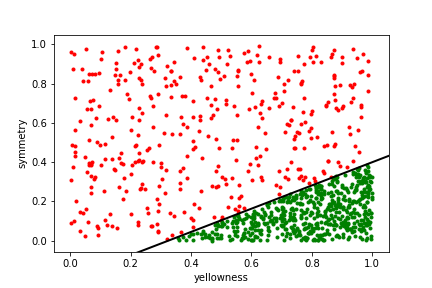

In [84]:
%matplotlib nbagg

np.random.seed(1)
fig = plt.figure()
plt.scatter(data[apples][:, 0], data[apples][:, 1], color = "red", marker=".", label="Apples")
plt.scatter(data[pears][:, 0], data[pears][:, 1], color = "green", marker=".", label="Pears")
plt.xlabel("yellowness")
plt.ylabel("symmetry")
line, = plt.plot([], [], color="black", linewidth=2)  # создаём линию, которая будет показывать границу разделения

from matplotlib.animation import FuncAnimation

perceptron_for_weights_line = create_perceptron(2)  # создаём перцептрон нужной размерности со случайными весами

from functools import partial
weights_ani = partial(
    step_by_step_weights, p=perceptron_for_weights_line, input_matrix=data[:, :-1], y=data[:, -1][:,np.newaxis]
)  # про partial почитайте на https://docs.python.org/3/library/functools.html#functools.partial

ani = FuncAnimation(fig, func=plot_line, frames=weights_ani, blit=False, interval=10, repeat=True)
# если Jupyter не показывает вам анимацию - раскомментируйте строчку ниже и посмотрите видео
ani.save("perceptron_seeking_for_solution.mp4", fps=15)
plt.show()

## Не забудьте остановить генерацию новых картинок, прежде чем идти дальше 
#(кнопка "выключить" в правом верхнем углу графика)

Он также подготовил несколько примеров, чтобы проиллюстрировать философию обучения перцептрона, которая не всегда интуитивна.

Во-первых, количество неправильно классифицированных примеров не всегда уменьшается. То есть в процессе обучения у перцептрона могут случаться "взлёты и падения" - делился мудростью Зюк.

In [62]:
def step_by_step_errors(p, input_matrix, y, max_steps=1e6):
    """
    обучает перцептрон последовательно на каждой строчке входных данных, 
    на каждом шаге обучения запоминает количество неправильно классифицированных примеров
    и возвращает список из этих количеств
    """
    def count_errors():
        return np.abs(p.vectorized_forward_pass(input_matrix).astype(np.int) - y).sum()
    errors_list = [count_errors()]
    i = 0
    errors = 1
    while errors and i < max_steps:
        i += 1
        errors = 0
        for example, answer in zip(input_matrix, y):
            example = example.reshape((example.size, 1))
            
            error = p.train_on_single_example(example, answer)
            errors += error
            errors_list.append(count_errors())
    return errors_list

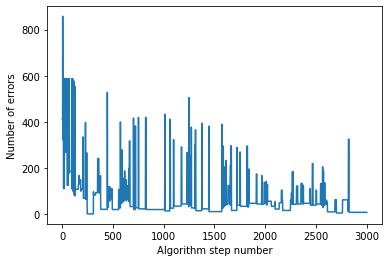

In [63]:
%matplotlib inline
perceptron_for_misclassification = create_perceptron(2)
errors_list = step_by_step_errors(perceptron_for_misclassification, input_matrix=data[:, :-1], y=data[:, -1][:,np.newaxis])
plt.plot(errors_list);
plt.ylabel("Number of errors")
plt.xlabel("Algorithm step number");

Мы испугались, что что-то идёт не так, но Зюк успокоил нас, сказав что такой страшный график - следствие нашей философии. Ведь философия обучения перцептрона в том, что лучше будут становиться веса, а не ответы.

"А как именно веса становятся лучше?" - вот вопрос, который теперь волновал каждого из нас. Мы решили посмотреть, как перцептрон научился тому, чему он научился. Возьмём тот вектор весов, к которым перцептрон сошёлся, и посмотрим, как изменяется расстояние до него, пока перцептрон учится.

In [64]:
def get_vector(p):
    """возвращает вектор из всех весов перцептрона, включая смещение"""
    v = np.array(list(p.w.ravel()) + [p.b])
    return v

In [65]:
def step_by_step_distances(p, ideal, input_matrix, y, max_steps=1e6):
    """обучает перцептрон p и записывает каждое изменение расстояния от текущих весов до ideal"""
    distances = [norm(get_vector(p) - ideal)]
    i = 0
    errors = 1
    while errors and i < max_steps:
        i += 1
        errors = 0
        for example, answer in zip(input_matrix, y):
            example = example.reshape((example.size, 1))
            
            error = p.train_on_single_example(example, answer)
            errors += error
            if error:
                distances.append(norm(get_vector(p) - ideal))
    return distances

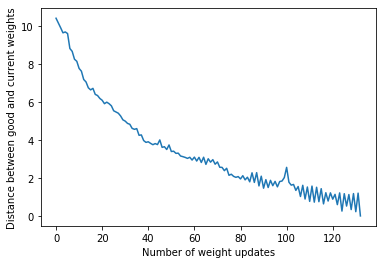

In [66]:
%matplotlib inline

np.random.seed(42)
init_weights = np.random.random_sample(3)
w, b = init_weights[:-1].reshape((2, 1)), init_weights[-1]
ideal_p = Perceptron(w.copy(), b.copy())
ideal_p.train_until_convergence(data[:, :-1], data[:, -1][:,np.newaxis])
ideal_weights = get_vector(ideal_p)

new_p = Perceptron(w.copy(), b.copy())
distances = step_by_step_distances(new_p, ideal_weights, data[:, :-1], data[:, -1][:,np.newaxis])

plt.xlabel("Number of weight updates")
plt.ylabel("Distance between good and current weights")
plt.plot(distances);

Как и можно было догадаться ещё по тому, как вела себя прямая на нашей анимированной картинке, вектор весов постепенно приближается к множеству хороших весов, хотя тоже "не всё гладко". Постарайтесь понять, почему, вспомнив доказательство сходимости перцептрона и понятие "векторов весов, хороших "с запасом"".

# Градиентный спуск

Покончив с перцептроном, Зюк несколько торопливо предложил посмотреть, как в подобной ситуации себя проявит логистический нейрон, основанный на градиентном спуске. В ответ на наши недоумевающие взгляды Зюк смущённо объяснил, что очень боится, что ему когда-нибудь попадётся какое-то "необычное" яблоко или груша. Тогда данные могут перестать быть линейно разделимыми, и он рискует зависнуть, обучая несходящийся перцептрон. Для взрослого Нейрянина допустить такое - большой позор.

Конечно, можно поставить ограничение на число шагов алгоритма... Но если вспомнить, как выглядит график количества ошибок, сразу станет понятно, что мы рискуем получить очень плохой классификатор, если оборвём процесс обучения раньше, чем нужно.

Мы пропросили Зюка не подсказывать нам слишком много на этот раз. Всё-таки мы хотим сами научиться программировать нейросети.
Зюк вежливо согласился, но настоял, чтобы мы посмотрели на его заготовку. Ключевые моменты он спрятал, предоставив нам возможность попрактиковаться.

/// Изучите код и реализуйте пропущенные функции.

In [1]:
## Определим разные полезные функции

def sigmoid(x):
    """сигмоидальная функция, работает и с числами, и с векторами (поэлементно)"""
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    """производная сигмоидальной функции, работает и с числами, и с векторами (поэлементно)"""
    return sigmoid(x) * (1 - sigmoid(x))

Класс Neuron нас немного напугал... Такая махина. Зюк заверил нас, что он только кажется большим. На самом деле можно было всё это написать в три-четыре строчки, но вот понять их - это было бы сложнее. Он также извинился за многословность и неоптимальность реализации, объясняя её тем, что "на таком удобнее учиться". Пришлось поверить.

In [68]:
class Neuron:
    
    def __init__(self, weights, activation_function=sigmoid, activation_function_derivative=sigmoid_prime):
        """
        weights - вертикальный вектор весов нейрона формы (m, 1), weights[0][0] - смещение
        activation_function - активационная функция нейрона, сигмоидальная функция по умолчанию
        activation_function_derivative - производная активационной функции нейрона
        """
        
        assert weights.shape[1] == 1, "Incorrect weight shape"
        
        self.w = weights
        self.activation_function = activation_function
        self.activation_function_derivative = activation_function_derivative
        
    def forward_pass(self, single_input):
        """
        активационная функция логистического нейрона
        single_input - вектор входов формы (m, 1), 
        первый элемент вектора single_input - единица (если вы хотите учитывать смещение)
        """
        
        result = 0
        for i in range(self.w.size):
            result += float(self.w[i] * single_input[i])
        return self.activation_function(result)
    
    def summatory(self, input_matrix):
        """
        Вычисляет результат сумматорной функции для каждого примера из input_matrix. 
        input_matrix - матрица примеров размера (n, m), каждая строка - отдельный пример,
        n - количество примеров, m - количество переменных.
        Возвращает вектор значений сумматорной функции размера (n, 1).
        """
        
        self.summ = input_matrix
        return(self.summ.dot(self.w))
    
    def activation(self, summatory_activation):
        """
        Вычисляет для каждого примера результат активационной функции,
        получив на вход вектор значений сумматорной функций
        summatory_activation - вектор размера (n, 1), 
        где summatory_activation[i] - значение суммматорной функции для i-го примера.
        Возвращает вектор размера (n, 1), содержащий в i-й строке 
        значение активационной функции для i-го примера.
        """
        
        self.summ = summatory_activation
        return(sigmoid(self.summ))
    
    def vectorized_forward_pass(self, input_matrix):
        """
        Векторизованная активационная функция логистического нейрона.
        input_matrix - матрица примеров размера (n, m), каждая строка - отдельный пример,
        n - количество примеров, m - количество переменных.
        Возвращает вертикальный вектор размера (n, 1) с выходными активациями нейрона
        (элементы вектора - float)
        """
        
        return self.activation(self.summatory(input_matrix))
        
    def SGD(self, X, y, batch_size, learning_rate=0.1, eps=1e-6, max_steps=200):
        """
        Стохастический градиентный спуск (англ. stochastic gradient descent) 
        − оптимизационный алгоритм, отличающийся от обычного градиентного спуска тем, что 
        градиент оптимизируемой функции считается на каждом шаге не как сумма градиентов от каждого 
        элемента выборки, а как градиент от одного, случайно выбранного элемента.
        Внешний цикл алгоритма градиентного спуска.
        X - матрица входных активаций (n, m)
        y - вектор правильных ответов (n, 1)
        
        learning_rate - константа скорости обучения
        batch_size - размер батча, на основании которого 
        рассчитывается градиент и совершается один шаг алгоритма
        
        eps - критерий остановки номер один: если разница между значением целевой функции 
        до и после обновления весов меньше eps - алгоритм останавливается. 
        Вторым вариантом была бы проверка размера градиента, а не изменение функции,
        что будет работать лучше - неочевидно. В заданиях используйте первый подход.
        
        max_steps - критерий остановки номер два: если количество обновлений весов 
        достигло max_steps, то алгоритм останавливается
        
        Метод возвращает 1, если отработал первый критерий остановки (спуск сошёлся) 
        и 0, если второй (спуск не достиг минимума за отведённое время).
        """
        
        indexes = np.arange(len(X))
        step = 0
        while step < max_steps:
            step += 1

            batch_indexes = np.random.choice(indexes, batch_size, replace=False)
            X_batch = X[batch_indexes]
            y_batch = y[batch_indexes]

            is_need_stop = self.update_mini_batch(X_batch, y_batch, learning_rate, eps)
            if is_need_stop == 1:
                return 1

        return 0
    
    def update_mini_batch(self, X, y, learning_rate, eps):
        """
        X - матрица размера (batch_size, m)
        y - вектор правильных ответов размера (batch_size, 1)
        learning_rate - константа скорости обучения
        eps - критерий остановки номер один: если разница между значением целевой функции 
        до и после обновления весов меньше eps - алгоритм останавливается. 
        
        Рассчитывает градиент (не забывайте использовать подготовленные заранее внешние функции) 
        и обновляет веса нейрона. Если ошибка изменилась меньше, чем на eps - возвращаем 1, 
        иначе возвращаем 0.
        """
        self.X = X
        self.y = y
        self.a = learning_rate
        self.eps = eps
        self.y_now = J_quadratic(self, self.X, self.y)
        self.grad = compute_grad_analytically(self, self.X, y)
        self.w += -self.a*self.grad
        self.y_now_new = J_quadratic(self, self.X, self.y)
        return 1 if abs(self.y_now - self.y_now_new) < eps else 0

Зюк добавил, что на практике стохастический градиентный спуск обычно ограничивается не по количеству шагов алгоритма, а по количеству эпох обучения. Мы с ужасом переглянулись. Выходит, что Зюк просто не понимает, что земляне редко живут дольше ста лет... "Зюк, - грустно сказали мы, - скорее всего, нам не удастся дождаться окончания работы алгоритма, люди столько не живут". Зюк сперва удивился, потом рассмеялся и объяснил: эпохой обучения называют предъявление всех примеров по одному разу. Обычно батчи формируют так: входные данные перемешиваются, после этого разбиваются на кусочки по batch_size штук в каждом. После того как все примеры хотя бы раз побывали в батче, данные перемешиваются снова. Мы облегчённо вздохнули. Сейчас нам интересно понаблюдать за отдельными изменениями весов, поэтому мы ограничиваем алгоритм не эпохами, а количеством обновлений весов.

Далее он показал нам код для расчета целевой функции и её градиента. Приятно было осознавать, что целевую функцию можно будет очень легко заменить, если нам захочется.

In [69]:
def J_quadratic(neuron, X, y):
    """
    Оценивает значение квадратичной целевой функции.
    Всё как в лекции, никаких хитростей.

    neuron - нейрон, у которого есть метод vectorized_forward_pass, предсказывающий значения на выборке X
    X - матрица входных активаций (n, m)
    y - вектор правильных ответов (n, 1)
        
    Возвращает значение J (число)
    """
    
    assert y.shape[1] == 1, 'Incorrect y shape'
    
    return 0.5 * np.mean((neuron.vectorized_forward_pass(X) - y) ** 2)

def J_quadratic_derivative(y, y_hat):
    """
    Вычисляет вектор частных производных целевой функции по каждому из предсказаний.
    y_hat - вертикальный вектор предсказаний,
    y - вертикальный вектор правильных ответов,
    
    В данном случае функция смехотворно простая, но если мы захотим поэкспериментировать 
    с целевыми функциями - полезно вынести эти вычисления в отдельный этап.
    
    Возвращает вектор значений производной целевой функции для каждого примера отдельно.
    """
    
    assert y_hat.shape == y.shape and y_hat.shape[1] == 1, 'Incorrect shapes'
    
    return (y_hat - y) / len(y)
    
def compute_grad_analytically(neuron, X, y, J_prime=J_quadratic_derivative):
    """
    Аналитическая производная целевой функции
    neuron - объект класса Neuron
    X - вертикальная матрица входов формы (n, m), на которой считается сумма квадратов отклонений
    y - правильные ответы для примеров из матрицы X
    J_prime - функция, считающая производные целевой функции по ответам
    
    Возвращает вектор размера (m, 1)
    """
    
    # Вычисляем активации
    # z - вектор результатов сумматорной функции нейрона на разных примерах
    
    z = neuron.summatory(X)
    y_hat = neuron.activation(z)

    # Вычисляем нужные нам частные производные
    dy_dyhat = J_prime(y, y_hat)
    dyhat_dz = neuron.activation_function_derivative(z)
    
    # осознайте эту строчку:
    dz_dw = X

    # а главное, эту:
    grad = ((dy_dyhat * dyhat_dz).T).dot(dz_dw)
    
    # можно было написать в два этапа. Осознайте, почему получается одно и то же
    # grad_matrix = dy_dyhat * dyhat_dz * dz_dw
    # grad = np.sum(, axis=0)
    
    # Сделаем из горизонтального вектора вертикальный
    grad = grad.T
    
    return grad

Однако нам в голову пришла тревожная мысль.. А вдруг при расчёте градиента допущена ошибка?  

Как мы говорили в лекциях, неплохо бы проверить, правильно ли мы считаем градиенты, до того, как куда-то по этим градиентам спускаться. Зюк, например, долго пытался понять, как нам удалось сделать тот градиентный спуск, что мы показывали вам в лекции под саундтрек из "Секретных материалов". А мы всего-то забыли одну матрицу обратить, когда производную считали.

Сейчас мы проверим, правильно ли считаются производные целевой функции: мы реализуем подсчёт частных производных по определению, как $$\frac{\partial f}{\partial x_i} = \frac{f\left(x_1,\ldots,x_{i-1}, x_i + \Delta x, x_{i+1}, \ldots, x_d\right) - f\left(x_1,\ldots, x_d\right)}{\Delta x}.$$ Это не определение, в определении был бы $\lim _{\Delta x\to 0}$! Но если мы возьмём достаточно малое $\Delta x$, то приближение будет неплохим.

Иными словами, мы посчитаем целевую функцию, чуть-чуть поменяем какой-нибудь вес, после этого посчитаем целевую функцию еще раз, дальше применяем определение, то есть разделим разницу в целевой функции на изменение веса.

После этого можно будет сравнить результаты, полученные с помощью аналитического и численного метода: они не должны сильно отличаться.

Вы уже должны догадываться, почему мы не можем всегда обходиться только лишь численным нахождением производной, но пример, непосредственно это иллюстрирующий, появится на следующей неделе.

In [70]:
def compute_grad_numerically(neuron, X, y, J=J_quadratic, eps=10e-2):
    """
    Численная производная целевой функции
    neuron - объект класса Neuron
    X - вертикальная матрица входов формы (n, m), на которой считается сумма квадратов отклонений
    y - правильные ответы для тестовой выборки X
    J - целевая функция, градиент которой мы хотим получить
    eps - размер $\delta w$ (малого изменения весов)
    """

    initial_cost = J(neuron, X, y)
    w_0 = neuron.w
    num_grad = np.zeros(w_0.shape)
    
    for i in range(len(w_0)):
        
        old_wi = neuron.w[i].copy()
        # Меняем вес
        neuron.w[i] += eps
        
        # Считаем новое значение целевой функции и вычисляем приближенное значение градиента
        num_grad[i] = (J(neuron, X, y) - initial_cost)/eps
        
        # Возвращаем вес обратно. Лучше так, чем -= eps, чтобы не накапливать ошибки округления
        neuron.w[i] = old_wi
            
    # проверим, что не испортили нейрону веса своими манипуляциями
    assert np.allclose(neuron.w, w_0), "МЫ ИСПОРТИЛИ НЕЙРОНУ ВЕСА"
    return num_grad

Давайте посмотрим, что у нас получилось:

In [71]:
# Подготовим данные

X = data[:, :-1]
y = data[:, -1]

X = np.hstack((np.ones((len(y), 1)), X))
y = y.reshape((len(y), 1)) # Обратите внимание на эту очень противную и важную строчку


# Создадим нейрон

w = np.random.random((X.shape[1], 1))
neuron = Neuron(w, activation_function=sigmoid, activation_function_derivative=sigmoid_prime)

# Посчитаем пример
num_grad = compute_grad_numerically(neuron, X, y, J=J_quadratic)
an_grad = compute_grad_analytically(neuron, X, y, J_prime=J_quadratic_derivative)

print("Численный градиент: \n", num_grad)
print("Аналитический градиент: \n", an_grad)

Численный градиент: 
 [[ 0.0213618 ]
 [-0.00339293]
 [ 0.02857961]]
Аналитический градиент: 
 [[ 0.01944716]
 [-0.00466464]
 [ 0.02861785]]


"Вроде бы похоже", но это не очень удовлетворительный ответ. Давайте посмотрим, как меняется наше приближение в зависимости от $\varepsilon$. Посчитаем для разных $\varepsilon$ модуль разности этих двух градиентов.

In [72]:
def print_grad_diff(eps):
    num_grad = compute_grad_numerically(neuron, X, y, J=J_quadratic, eps=float(eps))
    an_grad = compute_grad_analytically(neuron, X, y, J_prime=J_quadratic_derivative)
    print(np.linalg.norm(num_grad-an_grad))
    
interact(print_grad_diff, 
            eps=RadioButtons(options=["3", "1", "0.1", "0.001", "0.0001"]), separator=" ");

interactive(children=(RadioButtons(description='eps', options=('3', '1', '0.1', '0.001', '0.0001'), value='3')…

Неплохо, но можно лучше, причем с минимумом усилий.
Давайте вместо того, чтобы считать $\frac{f(x) - f(x + \Delta x)}{\Delta x}$, посмотрим на $\frac{f(x  + \Delta x) - f(x - \Delta x)}{2 \Delta x}$, то есть шагнём в обе стороны. Говорят, что на практике этот метод работает лучше.

Реализуйте функцию compute_grad_numerically_2, чтобы проверить, слухи это или нет.

In [73]:
def compute_grad_numerically_2(neuron, X, y, J=J_quadratic, eps=10e-2):
    """
    Численная производная целевой функции.
    neuron - объект класса Neuron с вертикальным вектором весов w,
    X - вертикальная матрица входов формы (n, m), на которой считается сумма квадратов отклонений,
    y - правильные ответы для тестовой выборки X,
    J - целевая функция, градиент которой мы хотим получить,
    eps - размер $\delta w$ (малого изменения весов).
    """
    
    w_0 = neuron.w
    num_grad = np.zeros(w_0.shape)

    for i in range(len(w_0)):
        old_wi = neuron.w[i].copy()
        # Меняем вес
        neuron.w[i] += eps
        cost_plus = J(neuron, X, y)

        neuron.w[i] = old_wi

        neuron.w[i] -= eps
        cost_minus = J(neuron, X, y)

        # Считаем новое значение целевой функции и вычисляем приближенное значение градиента
        num_grad[i] = (cost_plus - cost_minus) / (2 * eps)

        # Возвращаем вес обратно. Лучше так, чем -= eps, чтобы не накапливать ошибки округления
        neuron.w[i] = old_wi

    # проверим, что не испортили нейрону веса своими манипуляциями
    assert np.allclose(neuron.w, w_0), "МЫ ИСПОРТИЛИ НЕЙРОНУ ВЕСА"
    return num_grad

Давайте посмотрим, к какому результату привели ваши эксперименты:

In [74]:
def print_grad_diff_2(eps):
    num_grad = compute_grad_numerically_2(neuron, X, y, J=J_quadratic, eps=float(eps))
    an_grad = compute_grad_analytically(neuron, X, y, J_prime=J_quadratic_derivative)
    print(np.linalg.norm(num_grad-an_grad))
    
interact(print_grad_diff_2, 
            eps=RadioButtons(options=["3", "1", "0.1", "0.001", "0.0001"]), separator=" ");

interactive(children=(RadioButtons(description='eps', options=('3', '1', '0.1', '0.001', '0.0001'), value='3')…

Перед нами тот редкий случай, когда фраза **"на порядок лучше"** - очевидное преуменьшение!

## Визуализация

Мы сидели, уставшие, но довольные проделанной работой, как вдруг Зюк оживлённо воскликнул:

-- У нас ведь всего два входа! 

-- И что? - удивлённо спросили мы. 

-- А то, что если мы зафиксируем значение смещения, то можем полноценно визуализировать целевую функцию. Неужели вам не хочется посмотреть, как она выглядит в этой задачке? А еще.. А еще давайте добавим возможность перемешивать и сдвигать данные! Как вам такая идея?

Не дождавшись ответа, Зюк начал программировать. Он выглядел очень возбуждённым.

In [75]:
def J_by_weights(weights, X, y, bias):
    """
    Посчитать значение целевой функции для нейрона с заданными весами.
    Только для визуализации
    """
    new_w = np.hstack((bias, weights)).reshape((3,1))
    return J_quadratic(Neuron(new_w), X, y)

In [76]:
%matplotlib inline

max_b = 40
min_b = -40
max_w1 = 40
min_w1 = -40
max_w2 = 40
min_w2 = -40

g_bias = 0 # график номер 2 будет при первой генерации по умолчанию иметь то значение b, которое выставлено в первом
X_corrupted = X.copy()
y_corrupted = y.copy()

@interact(fixed_bias=FloatSlider(min=min_b, max=max_b, continuous_update=False), 
          mixing=FloatSlider(min=0, max=1, continuous_update=False, value=0),
          shifting=FloatSlider(min=0, max=1, continuous_update=False, value=0)
            )
def visualize_cost_function(fixed_bias, mixing, shifting):
    """
    Визуализируем поверхность целевой функции на (опционально) подпорченных данных и сами данные.
    Портим данные мы следующим образом: сдвигаем категории навстречу друг другу, на величину, равную shifting 
    Кроме того, меняем классы некоторых случайно выбранных примеров на противоположнее.
    Доля таких примеров задаётся переменной mixing
    
    Нам нужно зафиксировать bias на определённом значении, чтобы мы могли что-нибудь визуализировать.
    Можно посмотреть, как bias влияет на форму целевой функции
    """
    xlim = (min_w1, max_w1)
    ylim = (min_w2, max_w2)
    xx = np.linspace(*xlim, num=101)
    yy = np.linspace(*ylim, num=101)
    xx, yy = np.meshgrid(xx, yy)
    points = np.stack([xx, yy], axis=2)
    
    # не будем портить исходные данные, будем портить их копию
    corrupted = data.copy()
    
    # инвертируем ответы для случайно выбранного поднабора данных
    mixed_subset = np.random.choice(range(len(corrupted)), int(mixing * len(corrupted)), replace=False)
    corrupted[mixed_subset, -1] = np.logical_not(corrupted[mixed_subset, -1])
    
    # сдвинем все груши (внизу справа) на shifting наверх и влево
    pears = corrupted[:, 2] == 1
    apples = np.logical_not(pears)
    corrupted[pears, 0] -= shifting
    corrupted[pears, 1] += shifting
    
    # вытащим наружу испорченные данные
    global X_corrupted, y_corrupted
    X_corrupted = np.hstack((np.ones((len(corrupted),1)), corrupted[:, :-1]))
    y_corrupted = corrupted[:, -1].reshape((len(corrupted), 1))
    
    # посчитаем значения целевой функции на наших новых данных
    calculate_weights = partial(J_by_weights, X=X_corrupted, y=y_corrupted, bias=fixed_bias)
    J_values = np.apply_along_axis(calculate_weights, -1, points)
    
    fig = plt.figure(figsize=(16,5))
    # сначала 3D-график целевой функции
    ax_1 = fig.add_subplot(1, 2, 1, projection='3d')
    surf = ax_1.plot_surface(xx, yy, J_values, alpha=0.3)
    ax_1.set_xlabel("$w_1$")
    ax_1.set_ylabel("$w_2$")
    ax_1.set_zlabel("$J(w_1, w_2)$")
    ax_1.set_title("$J(w_1, w_2)$ for fixed bias = ${}$".format(fixed_bias))
    # потом плоский поточечный график повреждённых данных
    ax_2 = fig.add_subplot(1, 2, 2)
    plt.scatter(corrupted[apples][:, 0], corrupted[apples][:, 1], color = "red", alpha=0.7)
    plt.scatter(corrupted[pears][:, 0], corrupted[pears][:, 1], color = "green", alpha=0.7)
    ax_2.set_xlabel("yellowness")
    ax_2.set_ylabel("symmetry")

    plt.show()

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='fixed_bias', max=40.0, min=…

Мы с интересом рассматривали результат. По форме функции становилось понятно, что градиентный спуск будет обычно попадать в ловушку. На графике видна огромная яма, прижимающаяся своим дном к нулю. 

Это происходит от того, что данные линейно разделимы, и мы всегда можем увеличить хорошие веса, получив еще более хорошие (подумайте, почему это так).

Еще страшнее выглядят плоские участки. Как вы думаете, застрянем мы на них или нет?

Следующим графиком Зюк особенно нас порадовал. Можно было выбрать точку и bias, откуда мы хотим начать градиентный спуск, после чего его программа генерировала "историю обучения" (learning curve) - график значений целевой функции после очередного обновления весов. 

Смотря на поверхность целевой функции мы старались предсказать, к каким весам мы придём, если начнём спуск с той или иной точки. Оказалось что всё не так очевидно, как мы думали.

На графике ниже видно, что при "хорошем" раскладе (мы попали в большую яму) значение целевой функции всё время уменьшалось (хоть и по чуть-чуть), пока мы не достигали порога по количеству итераций. При плохом мы могли просто застрять в локальном минимуме или выйти на плато. 

\\\\ Как можно бороться с подобными ловушками мы поговорим на третьей и четвёртой неделях.

***Если в предыдущем задании вы "подпортили" данные - график будет строиться именно для подпорченных =)***

In [77]:
@interact(b=BoundedFloatText(value=str(g_bias), min=min_b, max=max_b, description="Enter $b$:"),
          w1=BoundedFloatText(value="0", min=min_w1, max=max_w1, description="Enter $w_1$:"),
          w2=BoundedFloatText(value="0", min=min_w2, max=max_w2, description="Enter $w_2$:"),
          learning_rate=Dropdown(options=["0.01", "0.05", "0.1", "0.5", "1", "5", "10"], 
                                value="0.01", description="Learning rate: ")
         )
def learning_curve_for_starting_point(b, w1, w2, learning_rate=0.1):
    w = np.array([b, w1, w2]).reshape(X_corrupted.shape[1], 1)
    learning_rate=float(learning_rate)
    neuron = Neuron(w, activation_function=sigmoid, activation_function_derivative=sigmoid_prime)

    story = [J_quadratic(neuron, X_corrupted, y_corrupted)]
    for _ in range(2000):
        neuron.SGD(X_corrupted, y_corrupted, 2, learning_rate=learning_rate, max_steps=2)
        story.append(J_quadratic(neuron, X_corrupted, y_corrupted))
    plt.plot(story)
    
    plt.title("Learning curve.\n Final $b={0:.3f}$, $w_1={1:.3f}, w_2={2:.3f}$".format(*neuron.w.ravel()))
    plt.ylabel("$J(w_1, w_2)$")
    plt.xlabel("Weight and bias update number")
    plt.show()

interactive(children=(BoundedFloatText(value=0.0, description='Enter $b$:', max=40.0, min=-40.0), BoundedFloat…

Близился вечер, и мы решили, что на сегодня уже утолили жажду программирования и познания. 
Даже Зюк выглядел немного утомлённым, насколько можно было судить по его инопланетной мимике.
Он пообещал, что в следующий раз мы сможем сделать настоящую нейросеть, и мы отправились спать,
думая о предстоящей встрече.

Однако, не все. Кто-то из наших так увлёкся, что уже сейчас, не дожидаясь следующей встречи, отправился заменять целевые и активационные функции нейронов, наблюдая, как это отразится на результатах.


# 1.9 Многослойный перцептрон

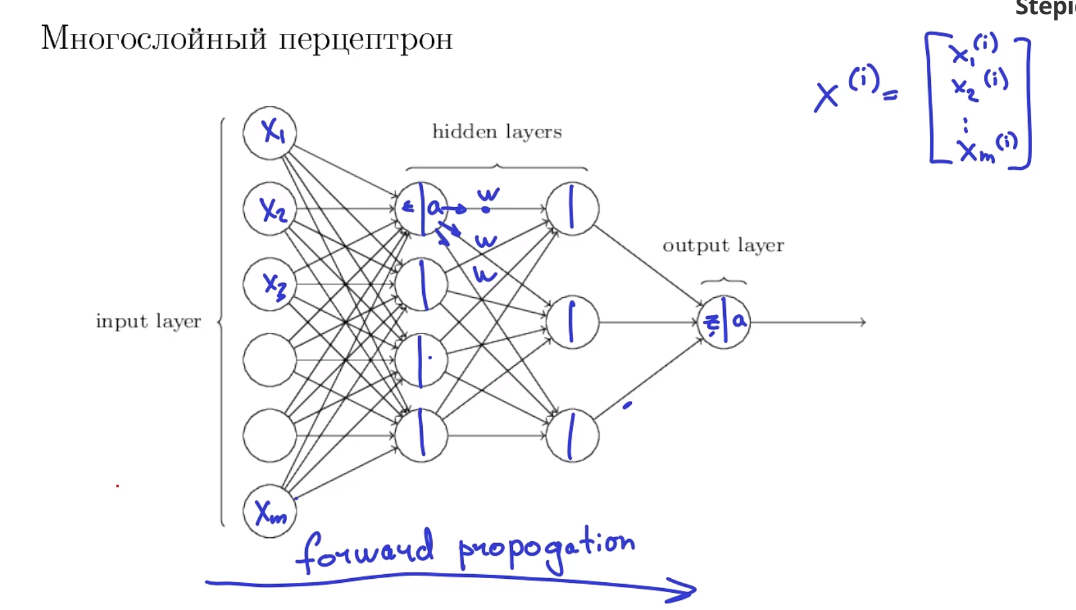

In [78]:
#Многослойный перцептрон, прямое распространение активаций
from IPython.display import Image #display picture
Image('multilayer_perceptron.png')

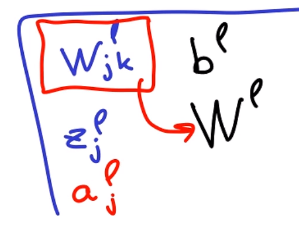

In [79]:
#1)w(l/jk) - вес выходящий из нейрона К, и входящий в нейрон j, слоя l
#2)z(j/l) - результат сумматорной функции нейрона j, слоя l
#3)a(j/l) - результат активационной функции нейрона j, слоя l
#4)b(l) - смещение слоя l
#5)W(l) - Матрица весов входящих в слой l
Image('Обозначения.png')

In [80]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense

import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

model = keras.Sequential([
    keras.layers.Dense(2, activation=tf.math.sigmoid),
    keras.layers.Dense(1, activation=tf.math.sigmoid)
])


model.compile(optimizer=tf.optimizers.SGD(1), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x, y, epochs=5000)

print(model.get_weights())

Train on 4 samples
Epoch 1/5000
4/4 [==============================] - 1s 132ms/sample - loss: 0.6948 - accuracy: 0.2500
Epoch 2/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6945 - accuracy: 0.5000
Epoch 3/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.6944 - accuracy: 0.5000
Epoch 4/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.6943 - accuracy: 0.5000
Epoch 5/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6943 - accuracy: 0.5000
Epoch 6/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.6942 - accuracy: 0.5000
Epoch 7/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6942 - accuracy: 0.5000
Epoch 8/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6942 - accuracy: 0.5000
Epoch 9/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.6942 - accuracy: 0.5000
Epoch 10/5000
4/4 [==============================] - 0s 500us/s

Epoch 81/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.6935 - accuracy: 0.5000
Epoch 82/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.6935 - accuracy: 0.5000
Epoch 83/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.6935 - accuracy: 0.5000
Epoch 84/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.6934 - accuracy: 0.5000
Epoch 85/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.6934 - accuracy: 0.5000
Epoch 86/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6934 - accuracy: 0.5000
Epoch 87/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.6934 - accuracy: 0.5000
Epoch 88/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.6934 - accuracy: 0.5000
Epoch 89/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.6934 - accuracy: 0.5000
Epoch 90/5000
4/4 [==============================] - 0s 250us/sample - lo

Epoch 161/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6932 - accuracy: 0.5000
Epoch 162/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.6932 - accuracy: 0.5000
Epoch 163/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.6932 - accuracy: 0.5000
Epoch 164/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.6932 - accuracy: 0.5000
Epoch 165/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6932 - accuracy: 0.5000
Epoch 166/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.6932 - accuracy: 0.5000
Epoch 167/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.6932 - accuracy: 0.5000
Epoch 168/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6932 - accuracy: 0.5000
Epoch 169/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6932 - accuracy: 0.5000
Epoch 170/5000
4/4 [==============================] - 0s 250us/sam

Epoch 240/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.6931 - accuracy: 0.5000
Epoch 241/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.6931 - accuracy: 0.5000
Epoch 242/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6931 - accuracy: 0.5000
Epoch 243/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6931 - accuracy: 0.5000
Epoch 244/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.6931 - accuracy: 0.5000
Epoch 245/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6931 - accuracy: 0.5000
Epoch 246/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6931 - accuracy: 0.5000
Epoch 247/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6931 - accuracy: 0.5000
Epoch 248/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6931 - accuracy: 0.5000
Epoch 249/5000
4/4 [==============================] - 0s 250us/s

Epoch 319/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6930 - accuracy: 0.5000
Epoch 320/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.6930 - accuracy: 0.5000
Epoch 321/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6930 - accuracy: 0.5000
Epoch 322/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6930 - accuracy: 0.5000
Epoch 323/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.6930 - accuracy: 0.5000
Epoch 324/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.6930 - accuracy: 0.5000
Epoch 325/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.6930 - accuracy: 0.5000
Epoch 326/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.6930 - accuracy: 0.5000
Epoch 327/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.6930 - accuracy: 0.5000
Epoch 328/5000
4/4 [==============================] - 0s 750us/sam

Epoch 398/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6929 - accuracy: 0.5000
Epoch 399/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6929 - accuracy: 0.5000
Epoch 400/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6929 - accuracy: 0.5000
Epoch 401/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6929 - accuracy: 0.5000
Epoch 402/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.6929 - accuracy: 0.5000
Epoch 403/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.6929 - accuracy: 0.5000
Epoch 404/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.6929 - accuracy: 0.5000
Epoch 405/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6929 - accuracy: 0.5000
Epoch 406/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.6929 - accuracy: 0.5000
Epoch 407/5000
4/4 [==============================] - 0s 500us/s

Epoch 477/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6927 - accuracy: 0.5000
Epoch 478/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.6927 - accuracy: 0.5000
Epoch 479/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6927 - accuracy: 0.5000
Epoch 480/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6927 - accuracy: 0.5000
Epoch 481/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6927 - accuracy: 0.5000
Epoch 482/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6927 - accuracy: 0.5000
Epoch 483/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6927 - accuracy: 0.5000
Epoch 484/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6927 - accuracy: 0.5000
Epoch 485/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6927 - accuracy: 0.5000
Epoch 486/5000
4/4 [==============================] - 0s 500us/s

Epoch 556/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6921 - accuracy: 0.5000
Epoch 557/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6921 - accuracy: 0.5000
Epoch 558/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.6921 - accuracy: 0.5000
Epoch 559/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6921 - accuracy: 0.5000
Epoch 560/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.6921 - accuracy: 0.5000
Epoch 561/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.6921 - accuracy: 0.5000
Epoch 562/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6921 - accuracy: 0.5000
Epoch 563/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6920 - accuracy: 0.5000
Epoch 564/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.6920 - accuracy: 0.5000
Epoch 565/5000
4/4 [==============================] - 0s 500us/s

Epoch 635/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.6901 - accuracy: 0.5000
Epoch 636/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6901 - accuracy: 0.5000
Epoch 637/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.6900 - accuracy: 0.5000
Epoch 638/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6900 - accuracy: 0.5000
Epoch 639/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6899 - accuracy: 0.5000
Epoch 640/5000
4/4 [==============================] - 0s 2ms/sample - loss: 0.6899 - accuracy: 0.5000
Epoch 641/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6898 - accuracy: 0.5000
Epoch 642/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6898 - accuracy: 0.5000
Epoch 643/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6897 - accuracy: 0.5000
Epoch 644/5000
4/4 [==============================] - 0s 500us/sampl

Epoch 714/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.6799 - accuracy: 0.5000
Epoch 715/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.6796 - accuracy: 0.7500
Epoch 716/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.6793 - accuracy: 0.7500
Epoch 717/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6790 - accuracy: 0.7500
Epoch 718/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.6787 - accuracy: 0.7500
Epoch 719/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6784 - accuracy: 0.7500
Epoch 720/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6781 - accuracy: 0.7500
Epoch 721/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.6778 - accuracy: 0.7500
Epoch 722/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6775 - accuracy: 0.7500
Epoch 723/5000
4/4 [==============================] - 0s 500us/s

Epoch 793/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.6255 - accuracy: 0.7500
Epoch 794/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.6243 - accuracy: 0.7500
Epoch 795/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6231 - accuracy: 0.7500
Epoch 796/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6218 - accuracy: 0.7500
Epoch 797/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.6205 - accuracy: 0.7500
Epoch 798/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.6192 - accuracy: 0.7500
Epoch 799/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6179 - accuracy: 0.7500
Epoch 800/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6166 - accuracy: 0.7500
Epoch 801/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.6153 - accuracy: 0.7500
Epoch 802/5000
4/4 [==============================] - 0s 500us/

Epoch 872/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.4467 - accuracy: 1.0000
Epoch 873/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.4425 - accuracy: 1.0000
Epoch 874/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.4382 - accuracy: 1.0000
Epoch 875/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.4338 - accuracy: 1.0000
Epoch 876/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.4294 - accuracy: 1.0000
Epoch 877/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.4250 - accuracy: 1.0000
Epoch 878/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.4205 - accuracy: 1.0000
Epoch 879/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.4160 - accuracy: 1.0000
Epoch 880/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.4114 - accuracy: 1.0000
Epoch 881/5000
4/4 [==============================] - 0s 500us/s

Epoch 951/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1599 - accuracy: 1.0000
Epoch 952/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.1580 - accuracy: 1.0000
Epoch 953/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.1562 - accuracy: 1.0000
Epoch 954/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.1544 - accuracy: 1.0000
Epoch 955/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.1526 - accuracy: 1.0000
Epoch 956/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.1509 - accuracy: 1.0000
Epoch 957/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1492 - accuracy: 1.0000
Epoch 958/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.1475 - accuracy: 1.0000
Epoch 959/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.1459 - accuracy: 1.0000
Epoch 960/5000
4/4 [==============================] - 0s 250us/sampl

Epoch 1030/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0784 - accuracy: 1.0000
Epoch 1031/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0778 - accuracy: 1.0000
Epoch 1032/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0773 - accuracy: 1.0000
Epoch 1033/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0768 - accuracy: 1.0000
Epoch 1034/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0762 - accuracy: 1.0000
Epoch 1035/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0757 - accuracy: 1.0000
Epoch 1036/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0752 - accuracy: 1.0000
Epoch 1037/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0747 - accuracy: 1.0000
Epoch 1038/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0742 - accuracy: 1.0000
Epoch 1039/5000
4/4 [==============================] - 

Epoch 1109/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0500 - accuracy: 1.0000
Epoch 1110/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0498 - accuracy: 1.0000
Epoch 1111/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0496 - accuracy: 1.0000
Epoch 1112/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0493 - accuracy: 1.0000
Epoch 1113/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0491 - accuracy: 1.0000
Epoch 1114/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0489 - accuracy: 1.0000
Epoch 1115/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0486 - accuracy: 1.0000
Epoch 1116/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0484 - accuracy: 1.0000
Epoch 1117/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0482 - accuracy: 1.0000
Epoch 1118/5000
4/4 [==============================] - 

Epoch 1188/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0363 - accuracy: 1.0000
Epoch 1189/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0362 - accuracy: 1.0000
Epoch 1190/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0360 - accuracy: 1.0000
Epoch 1191/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0359 - accuracy: 1.0000
Epoch 1192/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0358 - accuracy: 1.0000
Epoch 1193/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0357 - accuracy: 1.0000
Epoch 1194/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0355 - accuracy: 1.0000
Epoch 1195/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0354 - accuracy: 1.0000
Epoch 1196/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0353 - accuracy: 1.0000
Epoch 1197/5000
4/4 [==============================] - 0s

4/4 [==============================] - 0s 500us/sample - loss: 0.0284 - accuracy: 1.0000
Epoch 1267/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0283 - accuracy: 1.0000
Epoch 1268/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0282 - accuracy: 1.0000
Epoch 1269/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0282 - accuracy: 1.0000
Epoch 1270/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0281 - accuracy: 1.0000
Epoch 1271/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0280 - accuracy: 1.0000
Epoch 1272/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0279 - accuracy: 1.0000
Epoch 1273/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0278 - accuracy: 1.0000
Epoch 1274/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0278 - accuracy: 1.0000
Epoch 1275/5000
4/4 [==============================] - 0s 500us/sample 

Epoch 1345/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0232 - accuracy: 1.0000
Epoch 1346/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0231 - accuracy: 1.0000
Epoch 1347/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0231 - accuracy: 1.0000
Epoch 1348/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0230 - accuracy: 1.0000
Epoch 1349/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0230 - accuracy: 1.0000
Epoch 1350/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0229 - accuracy: 1.0000
Epoch 1351/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0229 - accuracy: 1.0000
Epoch 1352/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0228 - accuracy: 1.0000
Epoch 1353/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0228 - accuracy: 1.0000
Epoch 1354/5000
4/4 [==============================] - 0s

Epoch 1424/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0196 - accuracy: 1.0000
Epoch 1425/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0195 - accuracy: 1.0000
Epoch 1426/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0195 - accuracy: 1.0000
Epoch 1427/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0195 - accuracy: 1.0000
Epoch 1428/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0194 - accuracy: 1.0000
Epoch 1429/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0194 - accuracy: 1.0000
Epoch 1430/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0193 - accuracy: 1.0000
Epoch 1431/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0193 - accuracy: 1.0000
Epoch 1432/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0193 - accuracy: 1.0000
Epoch 1433/5000
4/4 [==============================] - 

Epoch 1503/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0169 - accuracy: 1.0000
Epoch 1504/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0169 - accuracy: 1.0000
Epoch 1505/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0169 - accuracy: 1.0000
Epoch 1506/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0168 - accuracy: 1.0000
Epoch 1507/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0168 - accuracy: 1.0000
Epoch 1508/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0168 - accuracy: 1.0000
Epoch 1509/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0167 - accuracy: 1.0000
Epoch 1510/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0167 - accuracy: 1.0000
Epoch 1511/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0167 - accuracy: 1.0000
Epoch 1512/5000
4/4 [==============================] - 

4/4 [==============================] - 0s 500us/sample - loss: 0.0149 - accuracy: 1.0000
Epoch 1582/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0149 - accuracy: 1.0000
Epoch 1583/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0148 - accuracy: 1.0000
Epoch 1584/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0148 - accuracy: 1.0000
Epoch 1585/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0148 - accuracy: 1.0000
Epoch 1586/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0148 - accuracy: 1.0000
Epoch 1587/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0148 - accuracy: 1.0000
Epoch 1588/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0147 - accuracy: 1.0000
Epoch 1589/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0147 - accuracy: 1.0000
Epoch 1590/5000
4/4 [==============================] - 0s 500us/sample 

Epoch 1660/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0133 - accuracy: 1.0000
Epoch 1661/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0133 - accuracy: 1.0000
Epoch 1662/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0132 - accuracy: 1.0000
Epoch 1663/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0132 - accuracy: 1.0000
Epoch 1664/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0132 - accuracy: 1.0000
Epoch 1665/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0132 - accuracy: 1.0000
Epoch 1666/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0132 - accuracy: 1.0000
Epoch 1667/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0132 - accuracy: 1.0000
Epoch 1668/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0131 - accuracy: 1.0000
Epoch 1669/5000
4/4 [==============================] - 

Epoch 1739/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0120 - accuracy: 1.0000
Epoch 1740/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0120 - accuracy: 1.0000
Epoch 1741/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0119 - accuracy: 1.0000
Epoch 1742/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0119 - accuracy: 1.0000
Epoch 1743/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0119 - accuracy: 1.0000
Epoch 1744/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0119 - accuracy: 1.0000
Epoch 1745/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0119 - accuracy: 1.0000
Epoch 1746/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0119 - accuracy: 1.0000
Epoch 1747/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0119 - accuracy: 1.0000
Epoch 1748/5000
4/4 [==============================] - 

Epoch 1818/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0109 - accuracy: 1.0000
Epoch 1819/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0109 - accuracy: 1.0000
Epoch 1820/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0109 - accuracy: 1.0000
Epoch 1821/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0109 - accuracy: 1.0000
Epoch 1822/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0109 - accuracy: 1.0000
Epoch 1823/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0108 - accuracy: 1.0000
Epoch 1824/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0108 - accuracy: 1.0000
Epoch 1825/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0108 - accuracy: 1.0000
Epoch 1826/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0108 - accuracy: 1.0000
Epoch 1827/5000
4/4 [==============================] - 0s 5

Epoch 1897/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0100 - accuracy: 1.0000
Epoch 1898/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0100 - accuracy: 1.0000
Epoch 1899/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0100 - accuracy: 1.0000
Epoch 1900/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0100 - accuracy: 1.0000
Epoch 1901/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0100 - accuracy: 1.0000
Epoch 1902/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0099 - accuracy: 1.0000
Epoch 1903/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0099 - accuracy: 1.0000
Epoch 1904/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0099 - accuracy: 1.0000
Epoch 1905/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0099 - accuracy: 1.0000
Epoch 1906/5000
4/4 [==============================] - 

Epoch 1976/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0092 - accuracy: 1.0000
Epoch 1977/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0092 - accuracy: 1.0000
Epoch 1978/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0092 - accuracy: 1.0000
Epoch 1979/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0092 - accuracy: 1.0000
Epoch 1980/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0092 - accuracy: 1.0000
Epoch 1981/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0092 - accuracy: 1.0000
Epoch 1982/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0092 - accuracy: 1.0000
Epoch 1983/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0092 - accuracy: 1.0000
Epoch 1984/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0092 - accuracy: 1.0000
Epoch 1985/5000
4/4 [==============================] - 

Epoch 2055/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0086 - accuracy: 1.0000
Epoch 2056/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0086 - accuracy: 1.0000
Epoch 2057/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0086 - accuracy: 1.0000
Epoch 2058/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0086 - accuracy: 1.0000
Epoch 2059/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0085 - accuracy: 1.0000
Epoch 2060/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0085 - accuracy: 1.0000
Epoch 2061/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0085 - accuracy: 1.0000
Epoch 2062/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0085 - accuracy: 1.0000
Epoch 2063/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0085 - accuracy: 1.0000
Epoch 2064/5000
4/4 [==============================] - 

Epoch 2134/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0080 - accuracy: 1.0000
Epoch 2135/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0080 - accuracy: 1.0000
Epoch 2136/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0080 - accuracy: 1.0000
Epoch 2137/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0080 - accuracy: 1.0000
Epoch 2138/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0080 - accuracy: 1.0000
Epoch 2139/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0080 - accuracy: 1.0000
Epoch 2140/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0080 - accuracy: 1.0000
Epoch 2141/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0080 - accuracy: 1.0000
Epoch 2142/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0080 - accuracy: 1.0000
Epoch 2143/5000
4/4 [==============================] - 

Epoch 2213/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0075 - accuracy: 1.0000
Epoch 2214/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0075 - accuracy: 1.0000
Epoch 2215/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0075 - accuracy: 1.0000
Epoch 2216/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0075 - accuracy: 1.0000
Epoch 2217/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0075 - accuracy: 1.0000
Epoch 2218/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0075 - accuracy: 1.0000
Epoch 2219/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0075 - accuracy: 1.0000
Epoch 2220/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0075 - accuracy: 1.0000
Epoch 2221/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0075 - accuracy: 1.0000
Epoch 2222/5000
4/4 [==============================] - 

Epoch 2292/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0071 - accuracy: 1.0000
Epoch 2293/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0071 - accuracy: 1.0000
Epoch 2294/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0071 - accuracy: 1.0000
Epoch 2295/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0070 - accuracy: 1.0000
Epoch 2296/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0070 - accuracy: 1.0000
Epoch 2297/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0070 - accuracy: 1.0000
Epoch 2298/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0070 - accuracy: 1.0000
Epoch 2299/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0070 - accuracy: 1.0000
Epoch 2300/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0070 - accuracy: 1.0000
Epoch 2301/5000
4/4 [==============================] - 0

Epoch 2371/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0067 - accuracy: 1.0000
Epoch 2372/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0067 - accuracy: 1.0000
Epoch 2373/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0067 - accuracy: 1.0000
Epoch 2374/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0067 - accuracy: 1.0000
Epoch 2375/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0067 - accuracy: 1.0000
Epoch 2376/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0066 - accuracy: 1.0000
Epoch 2377/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0066 - accuracy: 1.0000
Epoch 2378/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0066 - accuracy: 1.0000
Epoch 2379/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0066 - accuracy: 1.0000
Epoch 2380/5000
4/4 [==============================] - 

Epoch 2450/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0063 - accuracy: 1.0000
Epoch 2451/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0063 - accuracy: 1.0000
Epoch 2452/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0063 - accuracy: 1.0000
Epoch 2453/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0063 - accuracy: 1.0000
Epoch 2454/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0063 - accuracy: 1.0000
Epoch 2455/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0063 - accuracy: 1.0000
Epoch 2456/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0063 - accuracy: 1.0000
Epoch 2457/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0063 - accuracy: 1.0000
Epoch 2458/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0063 - accuracy: 1.0000
Epoch 2459/5000
4/4 [==============================] - 0s

Epoch 2529/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0060 - accuracy: 1.0000
Epoch 2530/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0060 - accuracy: 1.0000
Epoch 2531/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0060 - accuracy: 1.0000
Epoch 2532/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0060 - accuracy: 1.0000
Epoch 2533/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0060 - accuracy: 1.0000
Epoch 2534/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0060 - accuracy: 1.0000
Epoch 2535/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0060 - accuracy: 1.0000
Epoch 2536/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0060 - accuracy: 1.0000
Epoch 2537/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0060 - accuracy: 1.0000
Epoch 2538/5000
4/4 [==============================] - 

Epoch 2608/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0057 - accuracy: 1.0000
Epoch 2609/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0057 - accuracy: 1.0000
Epoch 2610/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0057 - accuracy: 1.0000
Epoch 2611/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0057 - accuracy: 1.0000
Epoch 2612/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0057 - accuracy: 1.0000
Epoch 2613/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0057 - accuracy: 1.0000
Epoch 2614/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0057 - accuracy: 1.0000
Epoch 2615/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0057 - accuracy: 1.0000
Epoch 2616/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0057 - accuracy: 1.0000
Epoch 2617/5000
4/4 [==============================] - 0s

Epoch 2687/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0054 - accuracy: 1.0000
Epoch 2688/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0054 - accuracy: 1.0000
Epoch 2689/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0054 - accuracy: 1.0000
Epoch 2690/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0054 - accuracy: 1.0000
Epoch 2691/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0054 - accuracy: 1.0000
Epoch 2692/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0054 - accuracy: 1.0000
Epoch 2693/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0054 - accuracy: 1.0000
Epoch 2694/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0054 - accuracy: 1.0000
Epoch 2695/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0054 - accuracy: 1.0000
Epoch 2696/5000
4/4 [==============================] - 

Epoch 2766/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0052 - accuracy: 1.0000
Epoch 2767/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0052 - accuracy: 1.0000
Epoch 2768/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0052 - accuracy: 1.0000
Epoch 2769/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0052 - accuracy: 1.0000
Epoch 2770/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0052 - accuracy: 1.0000
Epoch 2771/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0052 - accuracy: 1.0000
Epoch 2772/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0052 - accuracy: 1.0000
Epoch 2773/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0052 - accuracy: 1.0000
Epoch 2774/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0052 - accuracy: 1.0000
Epoch 2775/5000
4/4 [==============================] - 0s

Epoch 2845/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0050 - accuracy: 1.0000
Epoch 2846/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0050 - accuracy: 1.0000
Epoch 2847/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0050 - accuracy: 1.0000
Epoch 2848/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0050 - accuracy: 1.0000
Epoch 2849/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0050 - accuracy: 1.0000
Epoch 2850/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0050 - accuracy: 1.0000
Epoch 2851/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0050 - accuracy: 1.0000
Epoch 2852/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0050 - accuracy: 1.0000
Epoch 2853/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0050 - accuracy: 1.0000
Epoch 2854/5000
4/4 [==============================] - 

Epoch 2924/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0048 - accuracy: 1.0000
Epoch 2925/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0048 - accuracy: 1.0000
Epoch 2926/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0048 - accuracy: 1.0000
Epoch 2927/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0048 - accuracy: 1.0000
Epoch 2928/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0048 - accuracy: 1.0000
Epoch 2929/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0048 - accuracy: 1.0000
Epoch 2930/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0048 - accuracy: 1.0000
Epoch 2931/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0048 - accuracy: 1.0000
Epoch 2932/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0048 - accuracy: 1.0000
Epoch 2933/5000
4/4 [==============================] - 0s 5

Epoch 3003/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0046 - accuracy: 1.0000
Epoch 3004/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0046 - accuracy: 1.0000
Epoch 3005/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0046 - accuracy: 1.0000
Epoch 3006/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0046 - accuracy: 1.0000
Epoch 3007/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0046 - accuracy: 1.0000
Epoch 3008/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0046 - accuracy: 1.0000
Epoch 3009/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0046 - accuracy: 1.0000
Epoch 3010/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0046 - accuracy: 1.0000
Epoch 3011/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0046 - accuracy: 1.0000
Epoch 3012/5000
4/4 [==============================] - 

Epoch 3082/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0044 - accuracy: 1.0000
Epoch 3083/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0044 - accuracy: 1.0000
Epoch 3084/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0044 - accuracy: 1.0000
Epoch 3085/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0044 - accuracy: 1.0000
Epoch 3086/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0044 - accuracy: 1.0000
Epoch 3087/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0044 - accuracy: 1.0000
Epoch 3088/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0044 - accuracy: 1.0000
Epoch 3089/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0044 - accuracy: 1.0000
Epoch 3090/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0044 - accuracy: 1.0000
Epoch 3091/5000
4/4 [==============================] - 0s

Epoch 3161/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0043 - accuracy: 1.0000
Epoch 3162/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0043 - accuracy: 1.0000
Epoch 3163/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0043 - accuracy: 1.0000
Epoch 3164/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0043 - accuracy: 1.0000
Epoch 3165/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0043 - accuracy: 1.0000
Epoch 3166/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0043 - accuracy: 1.0000
Epoch 3167/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0043 - accuracy: 1.0000
Epoch 3168/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0043 - accuracy: 1.0000
Epoch 3169/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0043 - accuracy: 1.0000
Epoch 3170/5000
4/4 [==============================] - 

Epoch 3240/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0041 - accuracy: 1.0000
Epoch 3241/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0041 - accuracy: 1.0000
Epoch 3242/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0041 - accuracy: 1.0000
Epoch 3243/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0041 - accuracy: 1.0000
Epoch 3244/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0041 - accuracy: 1.0000
Epoch 3245/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0041 - accuracy: 1.0000
Epoch 3246/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0041 - accuracy: 1.0000
Epoch 3247/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0041 - accuracy: 1.0000
Epoch 3248/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0041 - accuracy: 1.0000
Epoch 3249/5000
4/4 [==============================] - 

Epoch 3319/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0040 - accuracy: 1.0000
Epoch 3320/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0040 - accuracy: 1.0000
Epoch 3321/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0040 - accuracy: 1.0000
Epoch 3322/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0040 - accuracy: 1.0000
Epoch 3323/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0040 - accuracy: 1.0000
Epoch 3324/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0040 - accuracy: 1.0000
Epoch 3325/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0040 - accuracy: 1.0000
Epoch 3326/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0040 - accuracy: 1.0000
Epoch 3327/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0040 - accuracy: 1.0000
Epoch 3328/5000
4/4 [==============================] - 

Epoch 3398/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0039 - accuracy: 1.0000
Epoch 3399/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0039 - accuracy: 1.0000
Epoch 3400/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0039 - accuracy: 1.0000
Epoch 3401/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0038 - accuracy: 1.0000
Epoch 3402/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0038 - accuracy: 1.0000
Epoch 3403/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0038 - accuracy: 1.0000
Epoch 3404/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0038 - accuracy: 1.0000
Epoch 3405/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0038 - accuracy: 1.0000
Epoch 3406/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0038 - accuracy: 1.0000
Epoch 3407/5000
4/4 [==============================] - 

Epoch 3477/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0037 - accuracy: 1.0000
Epoch 3478/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0037 - accuracy: 1.0000
Epoch 3479/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0037 - accuracy: 1.0000
Epoch 3480/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0037 - accuracy: 1.0000
Epoch 3481/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0037 - accuracy: 1.0000
Epoch 3482/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0037 - accuracy: 1.0000
Epoch 3483/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0037 - accuracy: 1.0000
Epoch 3484/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0037 - accuracy: 1.0000
Epoch 3485/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0037 - accuracy: 1.0000
Epoch 3486/5000
4/4 [==============================] - 0s

Epoch 3556/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0036 - accuracy: 1.0000
Epoch 3557/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0036 - accuracy: 1.0000
Epoch 3558/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0036 - accuracy: 1.0000
Epoch 3559/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0036 - accuracy: 1.0000
Epoch 3560/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0036 - accuracy: 1.0000
Epoch 3561/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0036 - accuracy: 1.0000
Epoch 3562/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0036 - accuracy: 1.0000
Epoch 3563/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0036 - accuracy: 1.0000
Epoch 3564/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0036 - accuracy: 1.0000
Epoch 3565/5000
4/4 [==============================] - 

Epoch 3635/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0035 - accuracy: 1.0000
Epoch 3636/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0035 - accuracy: 1.0000
Epoch 3637/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0035 - accuracy: 1.0000
Epoch 3638/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0035 - accuracy: 1.0000
Epoch 3639/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0035 - accuracy: 1.0000
Epoch 3640/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0035 - accuracy: 1.0000
Epoch 3641/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0035 - accuracy: 1.0000
Epoch 3642/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0035 - accuracy: 1.0000
Epoch 3643/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0035 - accuracy: 1.0000
Epoch 3644/5000
4/4 [==============================] - 

Epoch 3714/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0034 - accuracy: 1.0000
Epoch 3715/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0034 - accuracy: 1.0000
Epoch 3716/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0034 - accuracy: 1.0000
Epoch 3717/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0034 - accuracy: 1.0000
Epoch 3718/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0034 - accuracy: 1.0000
Epoch 3719/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0034 - accuracy: 1.0000
Epoch 3720/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0034 - accuracy: 1.0000
Epoch 3721/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0034 - accuracy: 1.0000
Epoch 3722/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0034 - accuracy: 1.0000
Epoch 3723/5000
4/4 [==============================] - 

Epoch 3793/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0033 - accuracy: 1.0000
Epoch 3794/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0033 - accuracy: 1.0000
Epoch 3795/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0033 - accuracy: 1.0000
Epoch 3796/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0033 - accuracy: 1.0000
Epoch 3797/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0033 - accuracy: 1.0000
Epoch 3798/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0033 - accuracy: 1.0000
Epoch 3799/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0033 - accuracy: 1.0000
Epoch 3800/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0033 - accuracy: 1.0000
Epoch 3801/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0033 - accuracy: 1.0000
Epoch 3802/5000
4/4 [==============================] - 

Epoch 3872/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0032 - accuracy: 1.0000
Epoch 3873/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0032 - accuracy: 1.0000
Epoch 3874/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0032 - accuracy: 1.0000
Epoch 3875/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0032 - accuracy: 1.0000
Epoch 3876/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0032 - accuracy: 1.0000
Epoch 3877/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0032 - accuracy: 1.0000
Epoch 3878/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0032 - accuracy: 1.0000
Epoch 3879/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0032 - accuracy: 1.0000
Epoch 3880/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0032 - accuracy: 1.0000
Epoch 3881/5000
4/4 [==============================] - 

Epoch 3951/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0031 - accuracy: 1.0000
Epoch 3952/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0031 - accuracy: 1.0000
Epoch 3953/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0031 - accuracy: 1.0000
Epoch 3954/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0031 - accuracy: 1.0000
Epoch 3955/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0031 - accuracy: 1.0000
Epoch 3956/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0031 - accuracy: 1.0000
Epoch 3957/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0031 - accuracy: 1.0000
Epoch 3958/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0031 - accuracy: 1.0000
Epoch 3959/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0031 - accuracy: 1.0000
Epoch 3960/5000
4/4 [==============================] - 

Epoch 4030/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0031 - accuracy: 1.0000
Epoch 4031/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0031 - accuracy: 1.0000
Epoch 4032/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0031 - accuracy: 1.0000
Epoch 4033/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0031 - accuracy: 1.0000
Epoch 4034/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0031 - accuracy: 1.0000
Epoch 4035/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0030 - accuracy: 1.0000
Epoch 4036/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0030 - accuracy: 1.0000
Epoch 4037/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0030 - accuracy: 1.0000
Epoch 4038/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0030 - accuracy: 1.0000
Epoch 4039/5000
4/4 [==============================] - 

Epoch 4109/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0030 - accuracy: 1.0000
Epoch 4110/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0030 - accuracy: 1.0000
Epoch 4111/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0030 - accuracy: 1.0000
Epoch 4112/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0030 - accuracy: 1.0000
Epoch 4113/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0030 - accuracy: 1.0000
Epoch 4114/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0030 - accuracy: 1.0000
Epoch 4115/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0030 - accuracy: 1.0000
Epoch 4116/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0030 - accuracy: 1.0000
Epoch 4117/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0030 - accuracy: 1.0000
Epoch 4118/5000
4/4 [==============================] - 

Epoch 4188/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0029 - accuracy: 1.0000
Epoch 4189/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0029 - accuracy: 1.0000
Epoch 4190/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0029 - accuracy: 1.0000
Epoch 4191/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0029 - accuracy: 1.0000
Epoch 4192/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0029 - accuracy: 1.0000
Epoch 4193/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0029 - accuracy: 1.0000
Epoch 4194/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0029 - accuracy: 1.0000
Epoch 4195/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0029 - accuracy: 1.0000
Epoch 4196/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0029 - accuracy: 1.0000
Epoch 4197/5000
4/4 [==============================] - 0s

Epoch 4267/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0028 - accuracy: 1.0000
Epoch 4268/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0028 - accuracy: 1.0000
Epoch 4269/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0028 - accuracy: 1.0000
Epoch 4270/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0028 - accuracy: 1.0000
Epoch 4271/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0028 - accuracy: 1.0000
Epoch 4272/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0028 - accuracy: 1.0000
Epoch 4273/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0028 - accuracy: 1.0000
Epoch 4274/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0028 - accuracy: 1.0000
Epoch 4275/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0028 - accuracy: 1.0000
Epoch 4276/5000
4/4 [==============================] - 

Epoch 4346/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0028 - accuracy: 1.0000
Epoch 4347/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0028 - accuracy: 1.0000
Epoch 4348/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0028 - accuracy: 1.0000
Epoch 4349/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0028 - accuracy: 1.0000
Epoch 4350/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0028 - accuracy: 1.0000
Epoch 4351/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0028 - accuracy: 1.0000
Epoch 4352/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0028 - accuracy: 1.0000
Epoch 4353/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0028 - accuracy: 1.0000
Epoch 4354/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0028 - accuracy: 1.0000
Epoch 4355/5000
4/4 [==============================] - 0s

Epoch 4425/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0027 - accuracy: 1.0000
Epoch 4426/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0027 - accuracy: 1.0000
Epoch 4427/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0027 - accuracy: 1.0000
Epoch 4428/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0027 - accuracy: 1.0000
Epoch 4429/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0027 - accuracy: 1.0000
Epoch 4430/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0027 - accuracy: 1.0000
Epoch 4431/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0027 - accuracy: 1.0000
Epoch 4432/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0027 - accuracy: 1.0000
Epoch 4433/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0027 - accuracy: 1.0000
Epoch 4434/5000
4/4 [==============================] - 

Epoch 4504/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0026 - accuracy: 1.0000
Epoch 4505/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0026 - accuracy: 1.0000
Epoch 4506/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0026 - accuracy: 1.0000
Epoch 4507/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0026 - accuracy: 1.0000
Epoch 4508/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0026 - accuracy: 1.0000
Epoch 4509/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0026 - accuracy: 1.0000
Epoch 4510/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0026 - accuracy: 1.0000
Epoch 4511/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0026 - accuracy: 1.0000
Epoch 4512/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0026 - accuracy: 1.0000
Epoch 4513/5000
4/4 [==============================] - 

Epoch 4583/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0026 - accuracy: 1.0000
Epoch 4584/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0026 - accuracy: 1.0000
Epoch 4585/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0026 - accuracy: 1.0000
Epoch 4586/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0026 - accuracy: 1.0000
Epoch 4587/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0026 - accuracy: 1.0000
Epoch 4588/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0026 - accuracy: 1.0000
Epoch 4589/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0026 - accuracy: 1.0000
Epoch 4590/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0026 - accuracy: 1.0000
Epoch 4591/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0026 - accuracy: 1.0000
Epoch 4592/5000
4/4 [==============================] - 

4/4 [==============================] - 0s 1ms/sample - loss: 0.0025 - accuracy: 1.0000
Epoch 4662/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0025 - accuracy: 1.0000
Epoch 4663/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0025 - accuracy: 1.0000
Epoch 4664/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0025 - accuracy: 1.0000
Epoch 4665/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0025 - accuracy: 1.0000
Epoch 4666/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0025 - accuracy: 1.0000
Epoch 4667/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0025 - accuracy: 1.0000
Epoch 4668/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0025 - accuracy: 1.0000
Epoch 4669/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0025 - accuracy: 1.0000
Epoch 4670/5000
4/4 [==============================] - 0s 500us/sample - 

Epoch 4740/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0025 - accuracy: 1.0000
Epoch 4741/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0025 - accuracy: 1.0000
Epoch 4742/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0025 - accuracy: 1.0000
Epoch 4743/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0025 - accuracy: 1.0000
Epoch 4744/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0025 - accuracy: 1.0000
Epoch 4745/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0025 - accuracy: 1.0000
Epoch 4746/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0025 - accuracy: 1.0000
Epoch 4747/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0025 - accuracy: 1.0000
Epoch 4748/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0025 - accuracy: 1.0000
Epoch 4749/5000
4/4 [==============================] - 

Epoch 4819/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0024 - accuracy: 1.0000
Epoch 4820/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0024 - accuracy: 1.0000
Epoch 4821/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0024 - accuracy: 1.0000
Epoch 4822/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0024 - accuracy: 1.0000
Epoch 4823/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0024 - accuracy: 1.0000
Epoch 4824/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0024 - accuracy: 1.0000
Epoch 4825/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0024 - accuracy: 1.0000
Epoch 4826/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0024 - accuracy: 1.0000
Epoch 4827/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0024 - accuracy: 1.0000
Epoch 4828/5000
4/4 [==============================] - 

Epoch 4898/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0024 - accuracy: 1.0000
Epoch 4899/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0024 - accuracy: 1.0000
Epoch 4900/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0024 - accuracy: 1.0000
Epoch 4901/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0024 - accuracy: 1.0000
Epoch 4902/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0024 - accuracy: 1.0000
Epoch 4903/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0024 - accuracy: 1.0000
Epoch 4904/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0024 - accuracy: 1.0000
Epoch 4905/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0024 - accuracy: 1.0000
Epoch 4906/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0024 - accuracy: 1.0000
Epoch 4907/5000
4/4 [==============================] - 

Epoch 4977/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0023 - accuracy: 1.0000
Epoch 4978/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0023 - accuracy: 1.0000
Epoch 4979/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0023 - accuracy: 1.0000
Epoch 4980/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0023 - accuracy: 1.0000
Epoch 4981/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0023 - accuracy: 1.0000
Epoch 4982/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0023 - accuracy: 1.0000
Epoch 4983/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.0023 - accuracy: 1.0000
Epoch 4984/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0023 - accuracy: 1.0000
Epoch 4985/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0023 - accuracy: 1.0000
Epoch 4986/5000
4/4 [==============================] - 

# 1.10 Алгоритм обратного распространения ошибки

In [ ]:
#Применения градиентного спуска, для обучения многослойного перцептрона

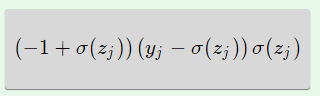

In [5]:
#Ошибка нейрона с номером jj из выходного слоя. Тип нейрона — сигмоидальный. (производная по dz(сумматорная ф-ия))
from IPython.display import Image #display picture
Image('formula1.png')

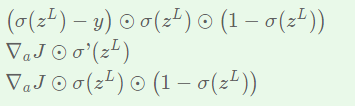

In [6]:
#и в векторном виде
Image('formula2.png')

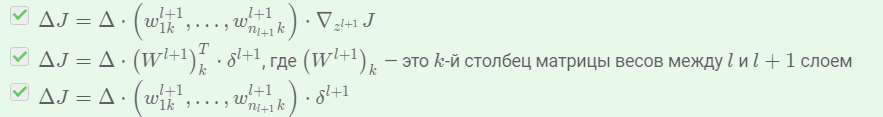

In [7]:
#изменения целевой функции от изменения входных активаций
Image('formula3.png')

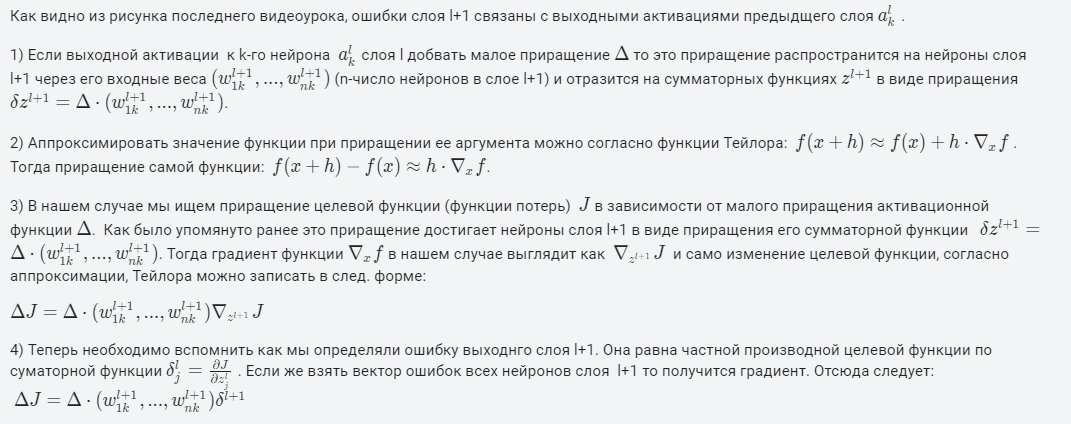

In [8]:
#вывод формулы изменения целевой функции от изменения входных активаций
Image('formula4.png')

In [11]:
print('w4',(1 - math.tanh(math.tanh(math.tanh(math.tanh(100))))**2)*math.tanh(math.tanh(math.tanh(100))))
print('w3',(1 - math.tanh(math.tanh(math.tanh(math.tanh(100))))**2)*(1-math.tanh(math.tanh(math.tanh(100)))**2)*math.tanh(math.tanh(100)))
print('w2',(1 - math.tanh(math.tanh(math.tanh(math.tanh(100))))**2)*(1-math.tanh(math.tanh(math.tanh(100)))**2)*(1-math.tanh(math.tanh(100))**2)*math.tanh(100))
print('w1',(1 - math.tanh(math.tanh(math.tanh(math.tanh(100))))**2)*(1 - math.tanh(math.tanh(math.tanh(100)))**2)*(1 - math.tanh(math.tanh(100))**2)*(1 - math.tanh(100)**2)*100)

w4 0.436145382444544
w3 0.3041246830975466
w2 0.16770685876939032
w1 0.0


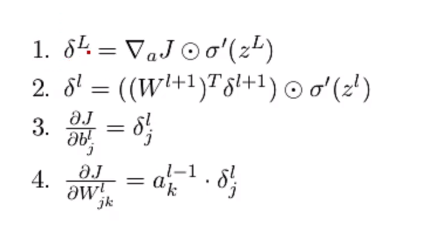

In [1]:
#основные формулы
from IPython.display import Image #display picture
Image('formula20.png')

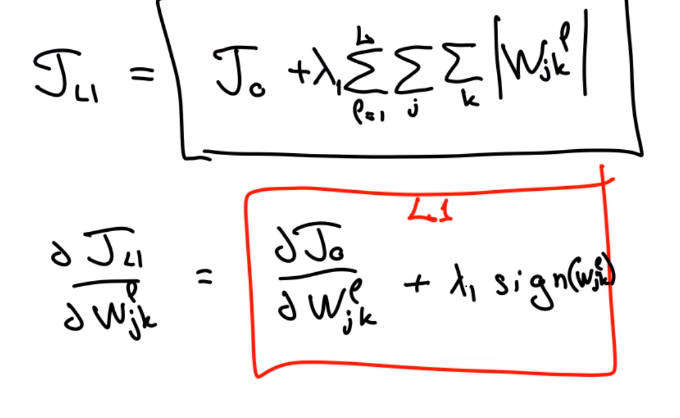

In [3]:
#Lasso Regression = L1
Image('l1reg.png')

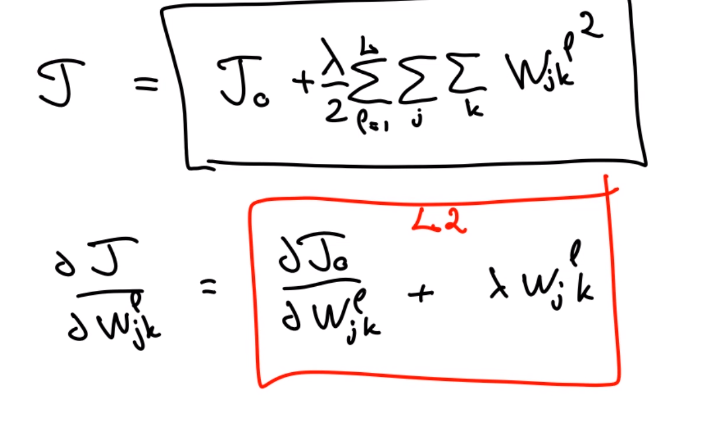

In [2]:
#L2 регуляризация Ridge Regression
from IPython.display import Image #display picture
Image('l2reg.png')

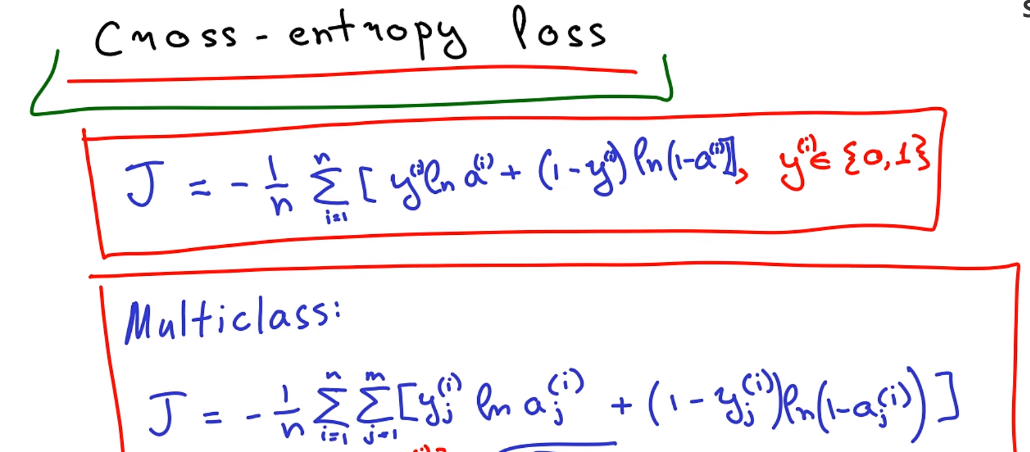

In [4]:
Image('crossentropyloss.png')

In [7]:
import numpy as np
np.log(0.7)+np.log(0.9)

-0.46203545959655873

# 1.11 Мониторинг состояния сети

In [8]:
#Параметры сети:
#1)Learning rate
#2)Количество нейронов в слое
#3)Количество скрытых слоев

## Введение

Гуляя по парку, Зюк увидел ребят, играющих в футбол. Это странное, на первый взгляд, занятие, вызвало у него неподдельное любопытство. Мы предложили ему присоединиться, но Зюк смущённо отказался. Оказалось, что задача расчёта траектории полёта того или иного предмета считается у нейрян достаточно сложной и у Зюка до сих пор не было времени, чтобы реализовать нейросеть, которая могла бы эту задачу решить.

## Нейросеть

Мы с радостью вызвались помочь Зюку написать нейросеть для такого случая.

Вот что у нас получилось. Кое-где мы запутались и не смогли написать нужный кусок кода. Помогите нам, пожалуйста!

// внимательно изучите комментарии к каждой функции, <br>
// осознайте код настолько, насколько сможете. Заполните пропущенные кусочки. <br>
// за основу класса Network взят пример с сайта neuralnetworksanddeeplearning.com

In [9]:
import numpy as np
import random

def sigmoid(z):
    """The sigmoid function.
    Сигмоида
    """
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function.
    Производная сигмоиды по e (шутка). По x
    """
    return sigmoid(z)*(1-sigmoid(z))

def cost_function(network, test_data, onehot=True):
    c = 0
    for example, y in test_data:
        if not onehot:
            y = np.eye(3, 1, k=-int(y))
        yhat = network.feedforward(example)
        c += np.sum((y - yhat)**2)
    return c / len(test_data)

In [10]:
class Network:

    def __init__(self, sizes, output=True):
        """
        Список ``sizes`` содержит количество нейронов в соответствующих слоях
        нейронной сети. К примеру, если бы этот лист выглядел как [2, 3, 1],
        то мы бы получили трёхслойную нейросеть, с двумя нейронами в первом
        (входном), тремя нейронами во втором (промежуточном) и одним нейроном
        в третьем (выходном, внешнем) слое. Смещения и веса для нейронных сетей
        инициализируются случайными значениями, подчиняющимися стандартному нормальному
        распределению. Обратите внимание, что первый слой подразумевается слоем, 
        принимающим входные данные, поэтому мы не будем добавлять к нему смещение 
        (делать это не принято, поскольку смещения используются только при 
        вычислении выходных значений нейронов последующих слоёв)
        """

        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]
        self.output = output

    def feedforward(self, a):
        """
        Вычислить и вернуть выходную активацию нейронной сети
        при получении ``a`` на входе (бывшее forward_pass).
        """
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """
        Обучить нейронную сеть, используя алгоритм стохастического
        (mini-batch) градиентного спуска. 
        ``training_data`` - лист кортежей вида ``(x, y)``, где 
        x - вход обучающего примера, y - желаемый выход (в формате one-hot). 
        Роль остальных обязательных параметров должна быть понятна из их названия.
        Если предоставлен опциональный аргумент ``test_data``, 
        то после каждой эпохи обучения сеть будет протестирована на этих данных 
        и промежуточный результат обучения будет выведен в консоль. 
        ``test_data`` -- это список кортежей из входных данных 
        и номеров правильных классов примеров (т.е. argmax(y),
        если y -- набор ответов в той же форме, что и в тренировочных данных).
        Тестирование полезно для мониторинга процесса обучения,
        но может существенно замедлить работу программы.
        """

        if test_data is not None: n_test = len(test_data)
        n = len(training_data)
        success_tests = 0
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data is not None and self.output:
                success_tests = self.evaluate(test_data)
                print("Эпоха {0}: {1} / {2}".format(
                    j, success_tests, n_test))
            elif self.output:
                print("Эпоха {0} завершена".format(j))
        if test_data is not None:
            return success_tests / n_test

    def update_mini_batch(self, mini_batch, eta):
        """
        Обновить веса и смещения нейронной сети, сделав шаг градиентного
        спуска на основе алгоритма обратного распространения ошибки, примененного
        к одному mini batch.
        ``mini_batch`` - список кортежей вида ``(x, y)``,
        ``eta`` - величина шага (learning rate).
        """
        
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
            
        eps = eta / len(mini_batch)
        self.weights = [w - eps * nw for w, nw in zip(self.weights, nabla_w)]
        self.biases  = [b - eps * nb for b, nb in zip(self.biases,  nabla_b)]

    def backprop(self, x, y):
        """
        Возвращает кортеж ``(nabla_b, nabla_w)`` -- градиент целевой функции по всем параметрам сети.
        ``nabla_b`` и ``nabla_w`` -- послойные списки массивов ndarray,
        такие же, как self.biases и self.weights соответственно.
        """
        # Эту функцию необходимо реализовать
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]

        # прямое распространение (forward pass)

        for b, w in zip(self.biases, self.weights):
            # посчитать активации
            pass

        # обратное распространение (backward pass)
        delta =  # ошибка выходного слоя
        nabla_b[-1] =  # производная J по смещениям выходного слоя
        nabla_w[-1] =  # производная J по весам выходного слоя

        # Обратите внимание, что переменная l в цикле ниже используется
        # немного иначе, чем в лекциях.  Здесь l = 1 означает последний слой, 
        # l = 2 - предпоследний и так далее.  
        # Мы перенумеровали схему, чтобы с удобством для себя 
        # использовать тот факт, что в Python к переменной типа list 
        # можно обращаться по негативному индексу.
        for l in range(2, self.num_layers):
            # дополнительные вычисления, чтобы легче записывалось
            #
            delta =  # ошибка на слое L-l
            nabla_b[-l] =  # производная J по смещениям L-l-го слоя
            nabla_w[-l] =  # производная J по весам L-l-го слоя
        return nabla_b, nabla_w

    def evaluate(self, test_data):
        """
        Вернуть количество тестовых примеров, для которых нейронная сеть
        возвращает правильный ответ. Обратите внимание: подразумевается,
        что выход нейронной сети - это индекс, указывающий, какой из нейронов
        последнего слоя имеет наибольшую активацию.
        """
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """
        Возвращает вектор частных производных (\partial C_x) / (\partial a) 
        целевой функции по активациям выходного слоя.
        """
        return (output_activations-y)

SyntaxError: invalid syntax (<ipython-input-10-4614250c84b2>, line 107)

Так много кода!.. Чтобы быть уверенным, что он работает правильно, нам не обойтись без тестирования. Вообще-то чем меньше функция делает, тем проще её тестировать: мы можем взять какие-то аргументы, ожидаемый результат для этих аргументов и сравнить его с тем, который реально выдаст наша функция. Если реальность совпала с ожиданием, то всё в порядке — тест пройден!

В качестве примера мы покажем довольно общий тест — тот случай, который указан в описании задания. Если вам понравится такой подход, вы можете развить идею на ваш вкус.

Одним из самых распространённых средств тестирования является встроенная в Python система `doctest`. Тесты оформляются в очень наглядном виде внутри первого комментария к функции (в `docstring`). Символом `>>>` начинаются строки, которые система выполнит. А следующие за ними строки без клювиков — это ожидаемые результаты выполнения. Это очень похоже на снимок экрана при работе с интерпретатором, а разница в том, что система сама сравнивает ожидаемые и реальные результаты. Если они не совпадут, выведется сообщение об ошибке.

Подробнее можно прочитать в [документации по doctest](https://docs.python.org/3.4/library/doctest.html).

In [ ]:
import doctest

In [ ]:
# Описание теста. Само по себе оно ещё ничего не проверяет,
# это просто функция, которую можно вызвать.
def sample_backprop1():
    """
    Пример тестового случая. Создает сеть, запускает функцию backprop и
    проверяет возвращенные значения.
    
    >>> nabla_b, nabla_w = sample_backprop1()
    >>> print(nabla_b[0])
    [[ 0.00214254]
     [-0.05287709]]
    >>> print(nabla_w[0])
    [[ 0.00214254  0.00428509  0.00642763]
     [-0.05287709 -0.10575419 -0.15863128]]
    """
    nn = Network([3,2])
    nn.biases = [np.array([[-1], [-1]])]
    nn.weights = [np.array([[-1, 1,-1], [ 1, -1, 1]])]
    x = np.array([[1], [2], [3]])
    y = np.array([[0], [1]])
    
    return nn.backprop(x, y)

# Непосредственный запуск теста.
# Указывается имя объекта (функции, класса и т. п.), из описания которой берутся тесты.
# Обычно аргумент verbose=True не используют, и если всё хорошо,
# то система просто ничего не выводит. Мы оставили его для наглядности.
doctest.run_docstring_examples(sample_backprop1, globals(), verbose=True)

Ура, товарищи! Теперь у нас есть класс для нейронной сети. Пора применить его к нашей задаче. В конце концов, мы ведь хотим поиграть с Зюком в футбол!

## Учим Зюка играть в футбол

В обучении мастерству игры мы решили начать с малого: будем учить Зюка пасоваться и делать навесы. Для этого нужно научиться решать такую задачу: зная начальное направление (угол от поверхности земли) и скорость мяча, определить, где этот мяч упадёт. Или иначе: попадёт ли мяч в мишень, находящуюся на земле, при заданных начальных условиях. Чтобы собрать тренировочные данные, мы поставили на земле мишень и пинали мячик в направлении этой мишени с разных расстояний, с разной силой и под разным углом. Зюк смотрел и запоминал. Он очень хотел научиться определять, попадём ли мы в мишень или нет.

Зюк поделился с нами своими наблюдениями, давайте загрузим эти данные и обучим нейронную сеть!

In [ ]:
data = np.loadtxt("data.csv", delimiter=",")

В данных у нас скорость пинка, угол пинка (между направлением полёта мяча и землёй) и расстояние до мишени. Заметим сразу, что пинали мы от души: скорость броска от 0 и до 50. Угол, по вполне очевидным причинам, принимает значения из $\left[0;\frac{\pi}{2}\right]$. Разница в масштабах настолько существенна, что имеет смысл нормализовать наши данные, чтобы при обучении не отвлекаться на попытки скомпенсировать масштаб данных масштабом весов.

In [ ]:
means = data.mean(axis=0)
means[-1] = 0  # правильные ответы мы нормализовывать не будем: это качественные переменные
stds = data.std(axis=0)
stds[-1] = 1
data = (data - means) / stds

Чтобы у нас была возможность следить за успешностью обучения, сразу отделим часть данных в тестовое множество. Мы решили, что в этот раз не будем устраивать кросс-валидацию, поскольку нам хочется поскорее поиграть в футбол. Конечно, если бы задача была чуть более ответственной, без кросс-валидации мы бы не обошлись.

In [ ]:
np.random.seed(42)
test_index = np.random.choice([True, False], len(data), replace=True, p=[0.25, 0.75])
test  = data[test_index]
train = data[np.logical_not(test_index)]

Приведём теперь данные в тот вид, в котором они понимаются нашей нейросетью. Для обучения нам нужно, чтобы ответ был в формате one-hot: вектор длины 3 (общее количество классов), состоящий из нулей и одной единицы на месте правильного класса наблюдения. Мы сделаем это с помощью `np.eye`: для единицы, стоящей на `i`-м месте, нужно создать вектор `np.eye(3, 1, k=-i)`. Соответственно, когда мы будем итерироваться по нашим входным данным, искомое `i` для примера - это последний элемент строки с этим примером, то есть `d[-1]`. Получается несколько неуклюже: `np.eye(3, 1, k=-int(d[-1]))`. Если вам пришла в голову идея получше - пишите, делайте пулл-реквесты, Зюк будет рад!

Возможно, кого-то всё ещё пугает строчка `a[:, np.newaxis]`. Это то же самое, что `a.reshape(a.shape + (1,))` (только посимпатичнее) - добавление ещё одной оси в массив. Делает одномерный вектор вертикальным, помните [эту задачу](https://stepic.org/lesson/NumPy-основы-16462/step/7?unit=4283)?

In [ ]:
# eye - чтобы создать вертикальный вектор, аналогичный тому, который будет выдавать нейросеть на выходе
train = [(d[:3][:, np.newaxis], np.eye(3, 1, k=-int(d[-1]))) for d in train]  
test =  [(d[:3][:, np.newaxis], d[-1]) for d in test]

Это может выглядеть несколько странно, но так нам будет удобнее работать с сетью. Предлагаемый вариант не оптимален, но удобен в учебных целях.

Теперь создадим сеть:

In [ ]:
input_count  = 3  # 3 нейрона входного слоя
hidden_count = 6  # 5 нейронов внутреннего слоя
output_count = 3  # 3 нейрона выходного слоя, по индикатору для каждого из классов "недолёт", "попал" и "перелёт"

И тепеерь... Давайте её обучим! После каждой эпохи будем выводить достигнутую точность.

In [ ]:
random.seed(1)
np.random.seed(1)
nn = Network([input_count, hidden_count, output_count])
nn.SGD(training_data=train, epochs=100, mini_batch_size=5, eta=1, test_data=test)

Итак, что-то мы построили, причём доля правильных ответов этого "чего-то" равна 0.86, то есть чему-то отличному от случайного угадывания сеть явно научилась! Можно ли как-то посмотреть, что за правило усвоила наша модель? Что за закономерность она вывела? Оказывается, что можно!

Поскольку задача очень простая: предсказать, приземлится ли мячик в заданном отрезке, мы знаем, как выглядит правильное решение.

Действительно, если мы кидаем мячик с высоты 0 с заданной скоростью $v$ под углом $\alpha$, то он пролетит ровно $$s = \frac{v^2}{g}\cdot \sin\left(2\alpha\right).$$
Соответственно, можно построить график зависимости $s$ от $v$ и $\alpha$.

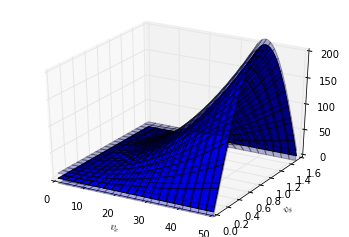

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
try:
    from scipy.constants import g, pi
except ImportError:
    g = 9.80665
    from math import pi
    
xx = np.linspace(0.5, 50, 200)
yy = np.linspace(1e-6, pi / 2, 200)
xx, yy = np.meshgrid(xx, yy)
points = np.stack([xx, yy], axis=2)
def s(coords):
    v, angle = coords
    return v * v * np.sin(2 * angle) / g 
dist = np.apply_along_axis(s, -1, points)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(xx, yy, dist)
ax.plot_surface(xx, yy, dist + 10, alpha=0.3)  # верхняя граница ответа "попал" в тренировочных данных
ax.plot_surface(xx, yy, dist - 10, alpha=0.3)  # нижняя граница ответа "попал" в тренировочных данных
plt.xlabel(r"$v_x$")
plt.ylabel(r"$v_y$")
xlim = plt.xlim()  # чтобы построить следующий график в том же масштабе
ylim = plt.ylim()  # чтобы построить следующий график в том же масштабе
zlim = ax.get_zlim()
ax.set_zlim(0, 200)
plt.show()

Осталось понять, как сравнить с этим решающую поверхность, полученную нашей сетью. Нарисуем все начальные точки вида (угол, скорость, дальность мишени), которые классифицируются как "будет попадание". То есть покажем натренированной нейронной сети много-много разных точек и отметим на графике те, которые, на её взгляд, соответствуют ситуации попадания в мишень. 

Так как точек много, будем смотреть только широкое "облако" около правильной поверхности, но не все точки в кубе. Осторожно: график будет строиться долго (мы $100\times 200\times 40 = 800\,000$ раз прогоняем данные через нейросеть)!

In [ ]:
xx = np.linspace(0.5, 100, 100)
yy = np.linspace(0, pi / 2, 180)
dd = np.linspace( -10,  10, 40)  # только точки от -2.5 до 2.5 должны бы войти в график, но посмотрим
def normalize(a):
    """нормализует очередной вход тестовых данных, подготавливая его к обработке нейросетью"""
    return ((np.array(a) - means[:-1]) / stds[:-1])[:, np.newaxis]
dots = np.array([(x, y, d + s([x, y])) for x in xx for y in yy for d in dd 
                 if np.argmax(nn.feedforward(normalize((x, y, d + s([x, y]))))) == 0])

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(dots[:, 0], dots[:, 1], dots[:, 2], alpha=0.5)
plt.xlim(*xlim)
plt.ylim(*ylim)
ax.set_zlim(*zlim)
plt.show()

Итак, мы разобрались с тем, что предсказания наша сеть делает, и они примерно правильные. Но мы взяли просто сеть с потолка: почему именно 6 нейронов на внутреннем слое? Почему только один внутренний слой?
Давайте поэкспериментируем с этим!

In [ ]:
from ipywidgets import *
@interact(layer1=IntSlider(min=0, max=10, continuous_update=False, description="1st inner layer: ", value=6),
          layer2=IntSlider(min=0, max=10, continuous_update=False, description="2nd inner layer:"),
          layer3=IntSlider(min=0, max=10, continuous_update=False, description="3rd inner layer: "),
          batch_size=BoundedIntText(min=1, max=len(data), value=10, description="Batch size: "),
          learning_rate=Dropdown(options=["0.01", "0.05", "0.1", "0.5", "1", "5", "10"], 
                                 description="Learning rate: ")
         )
def learning_curve_by_network_structure(layer1, layer2, layer3, batch_size, learning_rate):
    layers = [x for x in [input_count, layer1, layer2, layer3, output_count] if x > 0]
    nn = Network(layers, output=False)
    learning_rate=float(learning_rate)
    
    CER = []
    cost_train = []
    cost_test  = []
    for _ in range(150):
        nn.SGD(training_data=train, epochs=1, mini_batch_size=batch_size, eta=learning_rate)
        CER.append(1 - nn.evaluate(test) / len(test))
        cost_test.append(cost_function(nn, test, onehot=False))
        cost_train.append(cost_function(nn, train, onehot=True))
    
    fig = plt.figure(figsize=(15,5))
    fig.add_subplot(1,2,1)
    plt.ylim(0, 1)
    plt.plot(CER)
    plt.title("Classification error rate")
    plt.ylabel("Percent of incorrectly identified observations")
    plt.xlabel("Epoch number")
    
    fig.add_subplot(1,2,2)
    plt.plot(cost_train, label="Training error", color="orange")
    plt.plot(cost_test, label="Test error", color="blue")
    plt.title("Learning curve")
    plt.ylabel("Cost function")
    plt.xlabel("Epoch number")
    plt.legend()
    plt.show()

Этот виджет и ваши взаимодействия с ним должны оставить у вас в голове один большой вопрос: "А как вообще выбирать архитектуру сети, чтобы что-нибудь работало"?

## Регуляризация
Отлично, мы достигаем примерно 90%-ной точности только за счёт конструкции самой сети. Можно ли лучше?
Давайте разберёмся со стандартными приёмами (которые, кстати, будут гарантированно объявлять более проcтые модели более хорошими).

Напоминание: целевая функция при применении $\ell_1$-регуляризации выглядит так: 
$$J_1 = \frac{1}{n}\sum_{i=1}^n \left\vert\hat y_i - y_i\right\vert^2 + \lambda_1\sum_{j}\left\vert w_j\right\vert,$$
где $w_j$ - любой вес в том смысле, что это любое $w_{jk}^l$.

Целевая функция для $\ell_2$-регуляризации выглядит похожим образом:
$$J_2 = \frac{1}{n}\sum_{i=1}^n \left\vert\hat y_i - y_i\right\vert^2 + \lambda_2\frac{1}{2}\sum_{j}\left\vert w_j\right\vert^2,$$
поэтому обычно имеет смысл их объединить и задавать параметрами коэффициенты $\lambda_1$ и $\lambda_2$, чтобы не плодить сущности:
$$J_r = \frac{1}{n}\sum_{i=1}^n \left\vert\hat y_i - y_i\right\vert^2 + \lambda_1\sum_{j}\left\vert w_j\right\vert + \lambda_2\frac{1}{2}\sum_{j}\left\vert w_j\right\vert^2.$$

Упражнение: посчитайте производные целевой функции $J_r$ по весам и проверьте себя и нас в коде ниже: правильно ли мы считаем эти производные?

In [ ]:
class RegularizedNetwork(Network):
    def __init__(self, sizes, output=True, l1=0, l2=0):
        super().__init__(sizes, output)
        self.l1 = l1
        self.l2 = l2
        
    def update_mini_batch(self, mini_batch, eta):
        """
        Обновить веса и смещения нейронной сети, сделав шаг градиентного
        спуска на основе алгоритма обратного распространения ошибки, примененного
        к одному mini batch. Учесть штрафы за L1 и L2.
        ``mini_batch`` - список кортежей вида ``(x, y)``,
        ``eta`` - величина шага (learning rate).
        """
        
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
            
        eps = eta / len(mini_batch)
        self.weights = [w - eps * nw - self.l1 * np.sign(w) - self.l2 * w for w, nw in zip(self.weights, nabla_w)]
        self.biases  = [b - eps * nb for b, nb in zip(self.biases,  nabla_b)]

In [ ]:
%matplotlib inline
from ipywidgets import *
@interact(layer1=IntSlider(min=0, max=10, continuous_update=False, description="1st inner layer: ", value=6),
          layer2=IntSlider(min=0, max=10, continuous_update=False, description="2nd inner layer:"),
          layer3=IntSlider(min=0, max=10, continuous_update=False, description="3rd inner layer: "),
          batch_size=BoundedIntText(min=1, max=len(data), value=10, description="Batch size: "),
          learning_rate=Dropdown(options=["0.01", "0.05", "0.1", "0.5", "1", "5", "10"], 
                                 value="0.01", description="Learning rate: "),
          l1=Dropdown(options=["0", "0.0001", "0.0005", "0.001", "0.005", "0.01", "0.05", "0.1"], value="0.0001", 
                      description="$\ell_1:$"),
          l2=Dropdown(options=["0", "0.0001", "0.0005", "0.001", "0.005", "0.01", "0.05", "0.1"], value="0.0001", 
                      description="$\ell_2:$")
         )
def learning_curve_by_network_structure_and_regularization(layer1, layer2, layer3, batch_size, learning_rate, l1, l2):
    layers = [x for x in [input_count, layer1, layer2, layer3, output_count] if x > 0]
    nn = RegularizedNetwork(layers, output=False, l1=float(l1), l2=float(l2))
    learning_rate=float(learning_rate)
    
    CER = []
    cost_train = []
    cost_test  = []
    for _ in range(150):
        nn.SGD(training_data=train, epochs=1, mini_batch_size=batch_size, eta=learning_rate)
        CER.append(1 - nn.evaluate(test) / len(test))
        cost_test.append(cost_function(nn, test, onehot=False))
        cost_train.append(cost_function(nn, train, onehot=True))
    
    fig = plt.figure(figsize=(15,5))
    fig.add_subplot(1,2,1)
    plt.ylim(0, 1)
    plt.plot(CER)
    plt.title("Classification error rate")
    plt.ylabel("Percent of incorreclty identified observations")
    plt.xlabel("Epoch number")
    
    fig.add_subplot(1,2,2)
    plt.plot(cost_train, label="Training error", color="orange")
    plt.plot(cost_test, label="Test error", color="blue")
    plt.title("Learning curve")
    plt.ylabel("Cost function")
    plt.xlabel("Epoch number")
    plt.legend()
    plt.show()

Надеюсь, вы будете так же увлечённо рассматривать эти графики, как это делали мы (кое-кто час заворожённо двигал ползунки, всё больше и больше проникаясь пониманием!) Если у вас появились какие-то гениальные мысли (помимо двух заданий на интерпретацию графиков, которые ждут вас на Stepic.Org), не стесняйтесь писать их в комментариях к уроку!

In [3]:
import numpy as np
def sigmoid(x):
    """сигмоидальная функция, работает и с числами, и с векторами (поэлементно)"""
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    """производная сигмоидальной функции, работает и с числами, и с векторами (поэлементно)"""
    return sigmoid(x) * (1 - sigmoid(x))